In [5]:
pip install geopy

  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for geographiclib<3,>=1.52 from https://files.pythonhosted.org/packages/9f/5a/a26132406f1f40cf51ea349a5f11b0a46cec02a2031ff82e391c2537247a/geographiclib-2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --------- ----------------------------- 30.7/125.4 kB 325.1 kB/s eta 0:00:01
   --------- ----------------------------- 30.7/125.4 kB 325.1 kB/s eta 0:00:01
   ------------ -------------------------- 41.0/125.4 kB 245.8 kB/s eta 0:00:01
   ------------------- ------------------- 61.4/125.4 kB 297.7 kB/s eta 0:00:01
   ------------------------- ------------- 81.9/125.4

In [3]:
pip install geopandas

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/c4/64/7d344cfcef5efddf9cf32f59af7f855828e9d74b5f862eddf5bfd9f25323/geopandas-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyogrio>=0.7.2 from https://files.pythonhosted.org/packages/9d/66/ddb1c74c06c858ddbe889c68fea177d1d9c711af553d355417bdef8eaf17/pyogrio-0.9.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/79/95/eb68113c5b5737c342bde1bab92705dabe69c16299c5a122616e50f1fbd6/pyproj-3.6.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=2.0.0 from https://files.pythonhosted.org/packages/ec/1b/092fff53cbeced411eed2717592e31cadd3e52f0ebaba5f2df3f34913f96/shapely-2.0.5-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ------- -------------------------------- 61.4/323.6 kB 1.7 MB/s eta 0:00:01
   -

In [1]:
import warnings, re,math, datetime, time
start_time = time.time()
from datetime import timedelta
warnings.filterwarnings("ignore")
import math
import pandas as pd
import csv, io
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import nltk, string
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import geopandas as gpd
from geopy import geocoders
gn = geocoders.GeoNames(username = "idselection")
import shapely
from shapely.geometry import Point, LineString, Polygon

In [2]:
df = pd.read_csv("Elections2019.csv")
df.head()

,last_updated,tweet_id,created_at,user_location,full_text,quote_count,reply_count,retweet_count,favorite_count,hashtags,user_mentions_screen_name,City,State,District,Country
0,06-03-2019 17:30,1.100000e+18,06-03-2019 03:33,Guwahati,Guwahati has gained a lot of prominence in rec...,0.0,4.0,113.0,113,ActEast,narendramodi,Guwahati,Assam,NaN,India
1,17-03-2019 18:11,1.110000e+18,17-03-2019 17:27,NaN,RSS in school days itself? Indoctrinated since...,0.0,0.0,5.0,5,NaN,NaN,NaN,NaN,NaN,India
2,23-03-2019 18:07,1.110000e+18,23-03-2019 11:28,New Delhi,Words don't exist in Vaccum!\nModi's post Pulw...,0.0,4.0,31.0,31,NaN,NaN,New Delhi Municipal Council,Delhi,NaN,India
3,11-03-2019 17:47,1.100000e+18,26-02-2019 07:40,NaN,"India's #Icecream Industry stands at 15,000 cr...",0.0,0.0,3.0,3,Icecream,NaN,NaN,NaN,NaN,India
4,27-02-2019 18:18,1.100000e+18,27-02-2019 12:21,Delhi | Odisha,*40 CRPF Jawans killed in Pulwama Attack\n*IAF...,0.0,0.0,9.0,9,NaN,NaN,NaN,Delhi,NaN,India


In [3]:
df.shape

(46043, 15)

In [4]:
df.isnull().sum()

last_updated                     7
tweet_id                         2
created_at                       7
user_location                 5779
full_text                        2
quote_count                   1410
reply_count                   1410
retweet_count                   12
favorite_count                   0
hashtags                     36836
user_mentions_screen_name    28320
City                         30330
State                        28788
District                     46038
Country                      20700
dtype: int64

In [5]:
df.dtypes

last_updated                  object
tweet_id                     float64
created_at                    object
user_location                 object
full_text                     object
quote_count                  float64
reply_count                  float64
retweet_count                float64
favorite_count                 int64
hashtags                      object
user_mentions_screen_name     object
City                          object
State                         object
District                     float64
Country                       object
dtype: object

In [6]:
df = df[pd.notnull(df['created_at'])]
df.dropna(subset=["full_text"], inplace = True)
df.drop("District", axis = 1, inplace =True)
df.drop("user_location", axis=1, inplace = True)
df.shape

(46036, 13)

In [7]:
usa_terms = ["usa", "united states", "trump", "america", "democrat","cia", "fbi", "nsa"]
for i in range(0,46043):
    try:
        flag = True
        x = df.loc[i,"full_text"]
        #print(x)
        for j in usa_terms:
            if j in str(x).lower():
                flag = False
                break
        if flag==False:
            df = df.drop(i)
    except:
        pass
df = df[df["Country"] != "Others"]

In [8]:
df.shape

(39874, 13)

In [10]:
df["Country"].fillna("India", inplace=True)
df["retweet_count"].fillna(0, inplace=True)
df["quote_count"].fillna(0, inplace=True)
df["reply_count"].fillna(0, inplace=True)
df["favorite_count"].fillna(0, inplace=True)
df["State"].fillna("", inplace=True)
df["hashtags"].fillna("", inplace=True)
df["user_mentions_screen_name"].fillna("", inplace=True)
df["Country"]=df["Country"].replace("0","India") 
df["Country"]=df["Country"].replace("1","India")
df["Country"]=df["Country"].replace("2","India")
df["State"]=df["State"].replace("0","")
df["State"]=df["State"].replace("1","")
df["State"]=df["State"].replace("2","")
df["City"].fillna("", inplace=True) 

In [11]:
df.head()

,last_updated,tweet_id,created_at,full_text,quote_count,reply_count,retweet_count,favorite_count,hashtags,user_mentions_screen_name,City,State,Country
0,06-03-2019 17:30,1.100000e+18,06-03-2019 03:33,Guwahati has gained a lot of prominence in rec...,0.0,4.0,113.0,113,ActEast,narendramodi,Guwahati,Assam,India
1,17-03-2019 18:11,1.110000e+18,17-03-2019 17:27,RSS in school days itself? Indoctrinated since...,0.0,0.0,5.0,5,,,,,India
2,23-03-2019 18:07,1.110000e+18,23-03-2019 11:28,Words don't exist in Vaccum!\nModi's post Pulw...,0.0,4.0,31.0,31,,,New Delhi Municipal Council,Delhi,India
3,11-03-2019 17:47,1.100000e+18,26-02-2019 07:40,"India's #Icecream Industry stands at 15,000 cr...",0.0,0.0,3.0,3,Icecream,,,,India
4,27-02-2019 18:18,1.100000e+18,27-02-2019 12:21,*40 CRPF Jawans killed in Pulwama Attack\n*IAF...,0.0,0.0,9.0,9,,,,Delhi,India


In [12]:
lastupdate, created = [], []
for i in df["last_updated"]:
    lastupdate.append(datetime.datetime.strptime(i, "%d-%m-%Y %H:%M"))
for i in df["created_at"]:
    created.append(datetime.datetime.strptime(i, "%d-%m-%Y %H:%M"))

In [13]:
df["created_at"] = created
df["last_updated"] = lastupdate
df.drop(df[df['last_updated'] > datetime.datetime(2019,5,23,0,0)].index, inplace = True) 
df.drop(df[df['created_at'] > datetime.datetime(2019,5,23,0,0)].index, inplace = True) 

In [14]:
df.head()

,last_updated,tweet_id,created_at,full_text,quote_count,reply_count,retweet_count,favorite_count,hashtags,user_mentions_screen_name,City,State,Country
0,2019-03-06 17:30:00,1.100000e+18,2019-03-06 03:33:00,Guwahati has gained a lot of prominence in rec...,0.0,4.0,113.0,113,ActEast,narendramodi,Guwahati,Assam,India
1,2019-03-17 18:11:00,1.110000e+18,2019-03-17 17:27:00,RSS in school days itself? Indoctrinated since...,0.0,0.0,5.0,5,,,,,India
2,2019-03-23 18:07:00,1.110000e+18,2019-03-23 11:28:00,Words don't exist in Vaccum!\nModi's post Pulw...,0.0,4.0,31.0,31,,,New Delhi Municipal Council,Delhi,India
3,2019-03-11 17:47:00,1.100000e+18,2019-02-26 07:40:00,"India's #Icecream Industry stands at 15,000 cr...",0.0,0.0,3.0,3,Icecream,,,,India
4,2019-02-27 18:18:00,1.100000e+18,2019-02-27 12:21:00,*40 CRPF Jawans killed in Pulwama Attack\n*IAF...,0.0,0.0,9.0,9,,,,Delhi,India


In [15]:
df = df.sort_values(by=['last_updated'])

In [16]:
df.head()

,last_updated,tweet_id,created_at,full_text,quote_count,reply_count,retweet_count,favorite_count,hashtags,user_mentions_screen_name,City,State,Country
13334,2019-02-08 17:29:00,1.090000e+18,2019-02-08 17:28:00,@DasComrade Sir any comment on modi's grand en...,0.0,0.0,1.0,1,,DasComrade,Guwahati,Assam,India
9793,2019-02-08 17:29:00,1.090000e+18,2019-02-07 05:10:00,Congress made Vemula national talking point ev...,47.0,72.0,2353.0,2353,,,Greater Mumbai,Maharashtra,India
32798,2019-02-08 17:30:00,1.090000e+18,2019-02-08 10:18:00,BJP has been winning battles over the past mon...,1.0,12.0,513.0,513,,,Kolkata,West Bengal,India
34596,2019-02-08 17:30:00,1.090000e+18,2019-02-08 17:29:00,@inclusivemind2 @Ark82876233 @BJP4India @Rahul...,0.0,0.0,2.0,2,,"inclusivemind2,Ark82876233,BJP4India,RahulGandhi",Aligarh,Uttar Pradesh,India
28070,2019-02-08 17:30:00,1.090000e+18,2019-02-08 14:19:00,Senior Congress leader @ManishTewari : There w...,0.0,1.0,159.0,159,,ManishTewari,New Delhi Municipal Council,Delhi,India


In [17]:
df.shape

(39874, 13)

In [18]:
df.isnull().sum()

last_updated                 0
tweet_id                     0
created_at                   0
full_text                    0
quote_count                  0
reply_count                  0
retweet_count                0
favorite_count               0
hashtags                     0
user_mentions_screen_name    0
City                         0
State                        0
Country                      0
dtype: int64

In [19]:
capitals = dict(zip(
    ['Delhi', 'Karnataka', 'Andhra Pradesh', 'Maharashtra',
       'Punjab', 'Uttar Pradesh', 'Gujarat', 'Pondicherry', 'Jharkhand',
       'Chandigarh', 'Madhya Pradesh', 'West Bengal', 'Assam',
       'Jammu & Kashmir', 'Bihar', 'Haryana', 'Tamil Nadu', 'Orissa',
       'Chhattisgarh', 'Rajasthan', 'Uttaranchal', 'Telangana',
       'Daman & Diu', 'Meghalaya', 'Tripura', 'Kerala', 'Goa',
       'Himachal Pradesh', 'Manipur', 'Arunachal Pradesh', 'Lakshadweep',
       'Andaman & Nicobar Islands', 'Mizoram', 'Nagaland', 'Sikkim'],
                    
    ['New Delhi','Bangalore','Hyderabad','Mumbai','Chandigarh','Lucknow', 'Gandhinagar', 'Pondicherry',"Ranchi","Chandigarh",
         "Bhopal", "Kolkata", "Dispur", "Srinagar", "Patna", "Chandigarh", "Chennai", "Bhubaneswar", "Raipur",
        "Jaipur", "Dehradun", "Hyderabad", "Daman", "Shillong", "Agartala", "Trivandrum", "Panaji", "Shimla",
        "Imphal", "Itanagar", "Kavaratti", "Port Blair", "Aizawl", "Kohima","Gangtok"]))

In [20]:
for i in range(0,46044):
    try:
        if df["City"][i]=='':
            df["City"][i] = capitals[df["State"][i]]
    except:
        pass
df.head()

,last_updated,tweet_id,created_at,full_text,quote_count,reply_count,retweet_count,favorite_count,hashtags,user_mentions_screen_name,City,State,Country
13334,2019-02-08 17:29:00,1.090000e+18,2019-02-08 17:28:00,@DasComrade Sir any comment on modi's grand en...,0.0,0.0,1.0,1,,DasComrade,Guwahati,Assam,India
9793,2019-02-08 17:29:00,1.090000e+18,2019-02-07 05:10:00,Congress made Vemula national talking point ev...,47.0,72.0,2353.0,2353,,,Greater Mumbai,Maharashtra,India
32798,2019-02-08 17:30:00,1.090000e+18,2019-02-08 10:18:00,BJP has been winning battles over the past mon...,1.0,12.0,513.0,513,,,Kolkata,West Bengal,India
34596,2019-02-08 17:30:00,1.090000e+18,2019-02-08 17:29:00,@inclusivemind2 @Ark82876233 @BJP4India @Rahul...,0.0,0.0,2.0,2,,"inclusivemind2,Ark82876233,BJP4India,RahulGandhi",Aligarh,Uttar Pradesh,India
28070,2019-02-08 17:30:00,1.090000e+18,2019-02-08 14:19:00,Senior Congress leader @ManishTewari : There w...,0.0,1.0,159.0,159,,ManishTewari,New Delhi Municipal Council,Delhi,India


In [21]:
d = {}
for i in df["City"]:
    #print("Checking for ",i)
    if i not in d:
        d[i]=set()
    for j in df["City"]:
        if(i in j and i!=''):
            d[i].add(j)
for i in d:
    if len(d[i])>1:
        print(i,d[i])

Hyderabad {'Hyderabad M.Corp', 'Hyderabad'}
New Delhi {'New Delhi', 'New Delhi Municipal Council'}
Mumbai {'Mumbai', 'Greater Mumbai', 'Navi Mumbai'}
Anand {'Anand', 'Anand Nagar'}
Rewa {'Rewari', 'Rewa'}
Nagar {'Jemari  (J.K. Nagar Township)', 'S.A.S. Nagar (Mohali)', 'Anand Nagar', 'Nagar', 'L.B. Nagar'}
Thane {'Thanesar', 'Kalambe Turf Thane', 'Thane'}
Ara {'Ara', 'Arani'}
Jodhpur {'Jam Jodhpur', 'Jodhpur'}
Bad {'Bad', 'Badgam'}
Bokaro {'Bokaro', 'Bokaro Steel City'}
Bagh {'Baghpat', 'Bagh'}
Durg {'Durg', 'Durgapur'}
Banga {'Bangalore', 'Banga'}
Udaipur {'Udaipur', 'Chhota Udaipur'}
Ambikapur {'Ambikapur', 'Ambikapur Part-X'}
Lakhimpur {'North Lakhimpur', 'Lakhimpur'}


In [22]:
df["City"]=df["City"].replace("Navi Mumbai","Mumbai")
df["City"]=df["City"].replace("Greater Mumbai","Mumbai")
df["City"]=df["City"].replace("Bokaro Steel City","Bokaro")
df["City"]=df["City"].replace("L.B. Nagar","Hyderabad")
df["City"]=df["City"].replace("Delhi Cantt.","New Delhi")
df["City"]=df["City"].replace("New Delhi Municipal Council","New Delhi")
df["City"]=df["City"].replace("Hyderabad M.Corp", "Hyderabad")
df["City"]=df["City"].replace("Tambaur-cum-Ahmadabad", "Ahmedabad")
df["City"]=df["City"].replace("Ahmedabad Cantonment", "Ahmedabad")
df["City"]=df["City"].replace('S.A.S. Nagar (Mohali)', "Mohali")
df["City"]=df["City"].replace('Panchkula Urban Estate', "Panchkula")
df["City"]=df["City"].replace('Mirzapur-cum-Vindhyachal', "Mirzapur")
df["City"]=df["City"].replace('Jawaharnagar (Gujarat Refinery)', "Jawaharnagar")
df["City"]=df["City"].replace('Jemari  (J.K. Nagar Township)', "Jemari")
df["City"]=df["City"].replace('Jam Jodhpur', "Jodhpur")
df["City"]=df["City"].replace('Bodh Gaya', "Gaya")
df["City"]=df["City"].replace('Chamoli Gopeshwar', "Gopeshwar")
df["City"]=df["City"].replace('English Bazar', "Malda")
df["City"]=df["City"].replace('G.C.F Jabalpur', "Jabalpur")
df["City"]=df["City"].replace('Ambikapur Part-X', "Ambikapur")
df["City"]=df["City"].replace('Azhikode South', "Azikode")
df["City"]=df["City"].replace('Bhagalpur (M.Corp)', "Bhagalpur")
df["City"]=df["City"].replace('Bad', "Badgam")
df["City"]=df["City"].replace('Badgam', "Budgam")
df["City"]=df["City"].replace('Nagar', "Anand Nagar")
df["City"]=df["City"].replace('Kalambe Turf Thane', "Thane")
df["City"]=df["City"].replace('Anand', "Anand Nagar")
df["City"]=df["City"].replace('North Lakhimpur', "Lakhimpur")
df["City"]=df["City"].replace('Chhota Udaipur', "Udaipur")
df["City"]=df["City"].replace('Balod', "Baloda")
df["City"]=df["City"].replace('Chandrapur Bagicha', "Chandrapur")

In [23]:
set(df["City"]).intersection(set(df["State"]))

{'', 'Bihar', 'Chandigarh', 'Pondicherry'}

In [24]:
for i in range(1,46044):
    try:
        if df["City"][i] == "Bihar":
            if df["City"][i] == "" or df["City"][i] not in capitals:
                df["City"][i] = "Patna"
                df["State"][i] = "Bihar"
            else:
                df["City"][i] = capitals[df["State"][i]]
    except:
        pass

In [25]:
df = df.reset_index()
df.drop("index", axis=1, inplace = True)

In [26]:
df

,last_updated,tweet_id,created_at,full_text,quote_count,reply_count,retweet_count,favorite_count,hashtags,user_mentions_screen_name,City,State,Country
0,2019-02-08 17:29:00,1.090000e+18,2019-02-08 17:28:00,@DasComrade Sir any comment on modi's grand en...,0.0,0.0,1.0,1,,DasComrade,Guwahati,Assam,India
1,2019-02-08 17:29:00,1.090000e+18,2019-02-07 05:10:00,Congress made Vemula national talking point ev...,47.0,72.0,2353.0,2353,,,Mumbai,Maharashtra,India
2,2019-02-08 17:30:00,1.090000e+18,2019-02-08 10:18:00,BJP has been winning battles over the past mon...,1.0,12.0,513.0,513,,,Kolkata,West Bengal,India
3,2019-02-08 17:30:00,1.090000e+18,2019-02-08 17:29:00,@inclusivemind2 @Ark82876233 @BJP4India @Rahul...,0.0,0.0,2.0,2,,"inclusivemind2,Ark82876233,BJP4India,RahulGandhi",Aligarh,Uttar Pradesh,India
4,2019-02-08 17:30:00,1.090000e+18,2019-02-08 14:19:00,Senior Congress leader @ManishTewari : There w...,0.0,1.0,159.0,159,,ManishTewari,New Delhi,Delhi,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39869,2019-05-16 18:29:00,1.130000e+18,2019-05-16 14:55:00,A web page dedicated to tracking Rahul Gandhi'...,0.0,1.0,18.0,18,,,,,India
39870,2019-05-16 18:29:00,1.130000e+18,2019-05-15 13:15:00,Itâ€™s time to end the forever wars. But in th...,156.0,318.0,16017.0,16017,,,,,India
39871,2019-05-16 18:29:00,1.120000e+18,2019-04-26 14:10:00,The only phone number you need to reach any re...,0.0,0.0,99.0,99,,,,,India
39872,2019-05-16 18:29:00,1.130000e+18,2019-05-16 14:17:00,"Bjp officer bearer, faked Assangeâ€™s endorsem...",7.0,30.0,463.0,463,,PMOIndia,New Delhi,Delhi,India


In [27]:
df.shape

(39874, 13)

In [32]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [39]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aleky\AppData\Roaming\nltk_data...


True

In [40]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aleky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
import nltk
stemmer = SnowballStemmer('english')
vectorizer = TfidfVectorizer(use_idf = True, tokenizer = nltk.word_tokenize,stop_words='english', smooth_idf = True)
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)
sid = SentimentIntensityAnalyzer()
stopw = set(stopwords.words('english'))

In [29]:
contraction = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
                   "can't've": "cannot have", "'cause": "because", "could've": "could have", 
                   "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
                   "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                   "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
                   "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
                   "he'll've": "he he will have", "he's": "he is", "how'd": "how did", 
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                   "I'll've": "I will have","I'm": "I am", "I've": "I have", 
                   "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                   "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                   "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                   "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                   "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                   "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have", "bharatiya janata party" : "bjp",
                   "inc" : "congress","@narendramodi":"modi", "pappu":"rahul gandhi","gandhi":"rahul gandhi", "@rahulgandhi":"Rahul Gandhi"}

def clean(text):
    text = text.lower()
    temp = ""
    for i in text.split():
        if i not in stopw:
            try:
                temp+=contraction[i]+' '
            except:
                temp+= i+' '
    text = temp.strip()
    text = re.sub(r'http\S+','', text)
    text = text.lower().translate(remove_punctuation_map)
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = text.replace("bhartiya janata party",'bjp')
    text = text.replace("indian national congress", 'congress')
    text = text.replace("aam aadmi party", 'aap')
    text = text.replace("narendra modi", 'modi')
    text = text.replace("rahulgandhi", 'rahul gandhi')
    temp=''
    for i in text:
        if i.isdigit()==False:
            temp+=i
    text = temp
    text = text.split()
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    return text.strip()

In [30]:
preprocessed = []
for i in df["full_text"]:
    preprocessed.append(clean(i.strip().lower()))
preprocessed

['dascomrad sir comment modi grand entri',
 'congress made vemula nation talk point even though doubt case amp vemula dalit itself stop bjp make ramalingam case attain nation scale amp chang dalit discours take one remark pm modi make happen',
 'bjp win battl past month bengal pm modi arriv win biggest battl announc warcri upcom war tmc elect modisonarbangla',
 'inclusivemind ark bjpindia rahul gandhi bjp think cellchatumediacroniesscrit writer andbhakt crore speach give victori then late atal bihari vajpeyi much better shine india',
 'senior congress leader manishtewari jpc definit next parliament parallel crimin investig process go go away rafal rafalenot',
 'bc congress take kickback fr pp',
 'rahulliecaught exclus former defenc secretari g mohan kumar tear rahul gandhi lie say no pmo interfer rafal price',
 'expect meltdown congress elect wait till februari end bahut saar possibl hain ji',
 'stori realli expos develop propaganda nation congress cudnt yrs modi sirji ask month abl he

In [31]:
df.insert(4,"processed_tweet",preprocessed,True)
df.head()

,last_updated,tweet_id,created_at,full_text,processed_tweet,quote_count,reply_count,retweet_count,favorite_count,hashtags,user_mentions_screen_name,City,State,Country
0,2019-02-08 17:29:00,1.090000e+18,2019-02-08 17:28:00,@DasComrade Sir any comment on modi's grand en...,dascomrad sir comment modi grand entri,0.0,0.0,1.0,1,,DasComrade,Guwahati,Assam,India
1,2019-02-08 17:29:00,1.090000e+18,2019-02-07 05:10:00,Congress made Vemula national talking point ev...,congress made vemula nation talk point even th...,47.0,72.0,2353.0,2353,,,Mumbai,Maharashtra,India
2,2019-02-08 17:30:00,1.090000e+18,2019-02-08 10:18:00,BJP has been winning battles over the past mon...,bjp win battl past month bengal pm modi arriv ...,1.0,12.0,513.0,513,,,Kolkata,West Bengal,India
3,2019-02-08 17:30:00,1.090000e+18,2019-02-08 17:29:00,@inclusivemind2 @Ark82876233 @BJP4India @Rahul...,inclusivemind ark bjpindia rahul gandhi bjp th...,0.0,0.0,2.0,2,,"inclusivemind2,Ark82876233,BJP4India,RahulGandhi",Aligarh,Uttar Pradesh,India
4,2019-02-08 17:30:00,1.090000e+18,2019-02-08 14:19:00,Senior Congress leader @ManishTewari : There w...,senior congress leader manishtewari jpc defini...,0.0,1.0,159.0,159,,ManishTewari,New Delhi,Delhi,India


In [32]:
df["user_mentions_screen_name"].value_counts()[:9]

user_mentions_screen_name
                  25080
narendramodi       1377
RahulGandhi         693
INCIndia            399
BJP4India           143
ANI                 110
priyankagandhi       99
AmitShah             98
ArvindKejriwal       97
Name: count, dtype: int64

In [33]:
sentiment = {"Positive":[], "Negative" :[], "Neutral":[], "Compound":[]}
for i in df["processed_tweet"]:
    sentiment["Positive"].append(sid.polarity_scores(i)['pos'])
    sentiment["Negative"].append(sid.polarity_scores(i)['neg'])
    sentiment["Neutral"].append(sid.polarity_scores(i)['neu'])
    sentiment["Compound"].append(sid.polarity_scores(i)['compound'])

In [34]:
df.insert(9,"Neutral",sentiment['Neutral'],True)
df.insert(10,"Positive",sentiment['Positive'],True)
df.insert(11,"Negative",sentiment['Negative'],True)
df.insert(12,"Compound",sentiment['Compound'],True)

In [35]:
df.head()

,last_updated,tweet_id,created_at,full_text,processed_tweet,quote_count,reply_count,retweet_count,favorite_count,Neutral,Positive,Negative,Compound,hashtags,user_mentions_screen_name,City,State,Country
0,2019-02-08 17:29:00,1.090000e+18,2019-02-08 17:28:00,@DasComrade Sir any comment on modi's grand en...,dascomrad sir comment modi grand entri,0.0,0.0,1.0,1,0.625,0.375,0.000,0.4588,,DasComrade,Guwahati,Assam,India
1,2019-02-08 17:29:00,1.090000e+18,2019-02-07 05:10:00,Congress made Vemula national talking point ev...,congress made vemula nation talk point even th...,47.0,72.0,2353.0,2353,0.868,0.000,0.132,-0.5719,,,Mumbai,Maharashtra,India
2,2019-02-08 17:30:00,1.090000e+18,2019-02-08 10:18:00,BJP has been winning battles over the past mon...,bjp win battl past month bengal pm modi arriv ...,1.0,12.0,513.0,513,0.582,0.276,0.142,0.5719,,,Kolkata,West Bengal,India
3,2019-02-08 17:30:00,1.090000e+18,2019-02-08 17:29:00,@inclusivemind2 @Ark82876233 @BJP4India @Rahul...,inclusivemind ark bjpindia rahul gandhi bjp th...,0.0,0.0,2.0,2,0.884,0.116,0.000,0.4404,,"inclusivemind2,Ark82876233,BJP4India,RahulGandhi",Aligarh,Uttar Pradesh,India
4,2019-02-08 17:30:00,1.090000e+18,2019-02-08 14:19:00,Senior Congress leader @ManishTewari : There w...,senior congress leader manishtewari jpc defini...,0.0,1.0,159.0,159,1.000,0.000,0.000,0.0000,,ManishTewari,New Delhi,Delhi,India


In [36]:
df.loc[:,"quote_count":"retweet_count"].describe()

,quote_count,reply_count,retweet_count
count,39874.000000,39874.000000,39874.000000
mean,10.774038,32.574284,446.036615
std,114.089735,309.171354,2708.395701
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000
50%,0.000000,1.000000,18.000000
75%,2.000000,7.000000,135.000000
max,13544.000000,19447.000000,206958.000000


In [41]:
imp = []
for i in range(0,39874):
    if df["retweet_count"][i]>=70 or sum([df["retweet_count"][i],df["quote_count"][i],df["reply_count"][i]])>=50:
        imp.append(1)
    else:
        imp.append(0)

In [42]:
df.insert(8,"Importance",imp,True)
df.head()

,last_updated,tweet_id,created_at,full_text,processed_tweet,quote_count,reply_count,retweet_count,Importance,favorite_count,Neutral,Positive,Negative,Compound,hashtags,user_mentions_screen_name,City,State,Country
0,2019-02-08 17:29:00,1.090000e+18,2019-02-08 17:28:00,@DasComrade Sir any comment on modi's grand en...,dascomrad sir comment modi grand entri,0.0,0.0,1.0,0,1,0.625,0.375,0.000,0.4588,,DasComrade,Guwahati,Assam,India
1,2019-02-08 17:29:00,1.090000e+18,2019-02-07 05:10:00,Congress made Vemula national talking point ev...,congress made vemula nation talk point even th...,47.0,72.0,2353.0,1,2353,0.868,0.000,0.132,-0.5719,,,Mumbai,Maharashtra,India
2,2019-02-08 17:30:00,1.090000e+18,2019-02-08 10:18:00,BJP has been winning battles over the past mon...,bjp win battl past month bengal pm modi arriv ...,1.0,12.0,513.0,1,513,0.582,0.276,0.142,0.5719,,,Kolkata,West Bengal,India
3,2019-02-08 17:30:00,1.090000e+18,2019-02-08 17:29:00,@inclusivemind2 @Ark82876233 @BJP4India @Rahul...,inclusivemind ark bjpindia rahul gandhi bjp th...,0.0,0.0,2.0,0,2,0.884,0.116,0.000,0.4404,,"inclusivemind2,Ark82876233,BJP4India,RahulGandhi",Aligarh,Uttar Pradesh,India
4,2019-02-08 17:30:00,1.090000e+18,2019-02-08 14:19:00,Senior Congress leader @ManishTewari : There w...,senior congress leader manishtewari jpc defini...,0.0,1.0,159.0,1,159,1.000,0.000,0.000,0.0000,,ManishTewari,New Delhi,Delhi,India


In [43]:
df["Importance"].value_counts()

Importance
0    24544
1    15330
Name: count, dtype: int64

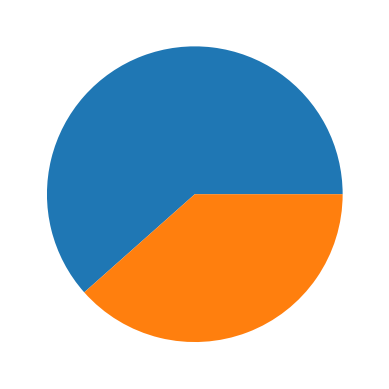

In [44]:
plt.pie(df["Importance"].value_counts())
plt.show()

In [45]:
dfcorr = df.corr(method="pearson",numeric_only=True)
dfcorr

,tweet_id,quote_count,reply_count,retweet_count,Importance,favorite_count,Neutral,Positive,Negative,Compound
tweet_id,1.000000,-0.041689,-0.020012,-0.022955,-0.005577,-0.022955,0.005210,-0.000297,-0.006349,0.002504
quote_count,-0.041689,1.000000,0.800002,0.622179,0.116798,0.622179,-0.014657,0.003821,0.014949,-0.010084
reply_count,-0.020012,0.800002,1.000000,0.719914,0.130431,0.719914,-0.015987,0.005671,0.014840,-0.009755
retweet_count,-0.022955,0.622179,0.719914,1.000000,0.204256,1.000000,-0.019757,0.022822,0.002982,0.011925
Importance,-0.005577,0.116798,0.130431,0.204256,1.000000,0.204256,-0.014811,0.007710,0.011366,-0.001475
favorite_count,-0.022955,0.622179,0.719914,1.000000,0.204256,1.000000,-0.019757,0.022822,0.002982,0.011925
Neutral,0.005210,-0.014657,-0.015987,-0.019757,-0.014811,-0.019757,1.000000,-0.632498,-0.658254,0.062636
Positive,-0.000297,0.003821,0.005671,0.022822,0.007710,0.022822,-0.632498,1.000000,-0.166741,0.671093
Negative,-0.006349,0.014949,0.014840,0.002982,0.011366,0.002982,-0.658254,-0.166741,1.000000,-0.731972
Compound,0.002504,-0.010084,-0.009755,0.011925,-0.001475,0.011925,0.062636,0.671093,-0.731972,1.000000


In [46]:
m11 = dfcorr["Compound"]["quote_count"]
m22 = dfcorr["Compound"]["reply_count"]
m33 = dfcorr["Compound"]["retweet_count"]
m44 = dfcorr["Compound"]["favorite_count"]
m55 = dfcorr["Compound"]["Importance"]

#Positive or compound?

m1 = dfcorr["Positive"]["quote_count"]
m2 = dfcorr["Positive"]["reply_count"]
m3 = dfcorr["Positive"]["retweet_count"]
m4 = dfcorr["Positive"]["favorite_count"]
m5 = dfcorr["Positive"]["Importance"]
score = lambda x1,x2,x3,x4,x5: m1*x1+m2*x2+m3*x3+m4*x4+x5
#score1 = lambda x1,x2,x3,x4,x5: m11*x1+m22*x2+m33*x3+m44*x4+x5
#Random test case
score(10,20,30,10,0)

1.0645196823887626

In [47]:
score(10,20,30,10,1) 

2.0645196823887626

In [48]:
scores = []
for i in range(0,39874):
    qt = df["quote_count"][i]
    reply = df["reply_count"][i]
    rt = df["retweet_count"][i]
    fav = df["favorite_count"][i]
    imp = df["Importance"][i]
    scores.append(score(qt,reply,rt,fav,imp))
df["Score"] = scores
df.head()

,last_updated,tweet_id,created_at,full_text,processed_tweet,quote_count,reply_count,retweet_count,Importance,favorite_count,Neutral,Positive,Negative,Compound,hashtags,user_mentions_screen_name,City,State,Country,Score
0,2019-02-08 17:29:00,1.090000e+18,2019-02-08 17:28:00,@DasComrade Sir any comment on modi's grand en...,dascomrad sir comment modi grand entri,0.0,0.0,1.0,0,1,0.625,0.375,0.000,0.4588,,DasComrade,Guwahati,Assam,India,0.045645
1,2019-02-08 17:29:00,1.090000e+18,2019-02-07 05:10:00,Congress made Vemula national talking point ev...,congress made vemula nation talk point even th...,47.0,72.0,2353.0,1,2353,0.868,0.000,0.132,-0.5719,,,Mumbai,Maharashtra,India,108.990410
2,2019-02-08 17:30:00,1.090000e+18,2019-02-08 10:18:00,BJP has been winning battles over the past mon...,bjp win battl past month bengal pm modi arriv ...,1.0,12.0,513.0,1,513,0.582,0.276,0.142,0.5719,,,Kolkata,West Bengal,India,24.487725
3,2019-02-08 17:30:00,1.090000e+18,2019-02-08 17:29:00,@inclusivemind2 @Ark82876233 @BJP4India @Rahul...,inclusivemind ark bjpindia rahul gandhi bjp th...,0.0,0.0,2.0,0,2,0.884,0.116,0.000,0.4404,,"inclusivemind2,Ark82876233,BJP4India,RahulGandhi",Aligarh,Uttar Pradesh,India,0.091290
4,2019-02-08 17:30:00,1.090000e+18,2019-02-08 14:19:00,Senior Congress leader @ManishTewari : There w...,senior congress leader manishtewari jpc defini...,0.0,1.0,159.0,1,159,1.000,0.000,0.000,0.0000,,ManishTewari,New Delhi,Delhi,India,8.263217


**Checking Party Counts**

In [49]:
compare = ["vijay rajnath ravishankar  yudhvirsethi patra narendra modi vijayvargiyah sadhvi bjp arun manoj reddy sushma rsprasad taneja maneka udhavthackeray gautam gambhir piyush goyal nitin gadkari gadkariji rss singh vasundhraraje bjpbengal smriti kailash gautamgambhir swamy udhav sushmaswaraj sadhvi pragya vasundhra sambitpatra shivraj arunjaitley manohar parikar subramanianswamy naredra modi manojtiwari amit modiji yogi adityanath sushma swaraj nitin vivekreddy shivrajsinghchouhan vijayrupani amit shah narendramodi pragya arun jaitley thackeray sunny deol bharatiya janata party kailashvijayvargiyah adityanath yogi jaitley piyush gadkari sambit smritiirani rajnathsingh irani swaraj gautam parikar nirmala bhartiya janta party ram nirmala sitaraman modi shivrajsingh nititngadkari manohar rammadhav smriti irani yedyurappa madhav gambhir narendra rajnath singh subrmanian goyal chouhan amitshah sitaraman manoharparikar ravishankar prasad rupani rao shah ravishankarprasad narsimha vivek vijay rupani prasad bhartiya janata party giriraj chowkidar",
          "congress rahul gandhi sonia pappu manish tiwari mani shankar aiyar amrinder singh navjot sidhu pilot sachin jyotiraditya scindia ashok gehlot ajay makhan makhen chidambaram raj babbar sheila dikshit kamal nath digvijay singh sanjay kaul ashok chavan prithviraj randeep surjaewala hooda deepender kapil sibal manmohan ahmed patil natwar gaurav vallabh pawan khera taneja reddy george antony venugopal rao raman gogoi lalu prasad yadav akhilesh ravat urmila milind deora siddaramiah shivkumar dks sandeep ashok tanwar prakash jha"]
documents = df["processed_tweet"]
party = []
for i in documents:
    l = len(i.split())
    freq_bjp = 0
    freq_cong = 0
    for j in compare[0].split():
        freq_bjp+=i.count(j.strip())
    for j in compare[1].split():
        freq_cong+=i.count(j.strip())
    #print(freq_cong, freq_bjp)
    if freq_bjp>freq_cong:
        party.append("BJP")
    elif freq_cong>freq_bjp:
        party.append("Congress")
    else:
        party.append("Other")

In [50]:
party.count("Other")

3649

In [51]:
party.count("BJP")

22234

In [53]:
party.count("Congress")

13991

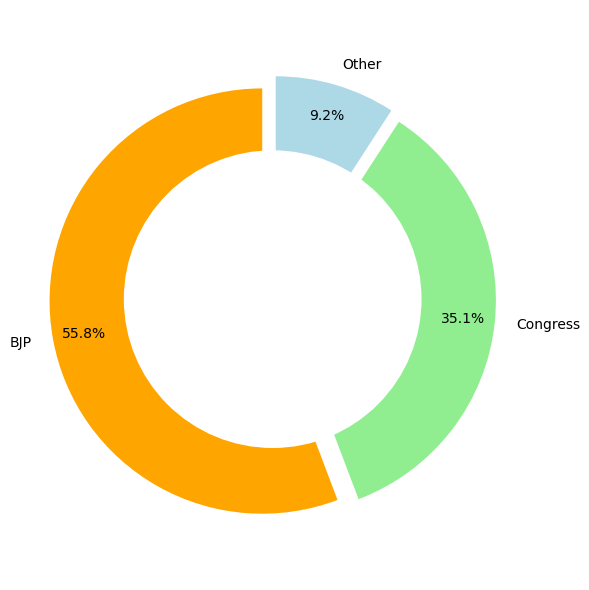

In [54]:
plt.rcParams["figure.figsize"] = [6,6]
labels = ["BJP","Congress","Other"]
count = [party.count("BJP"),party.count("Congress"),party.count("Other")]
explode = (0.05,0.05,0.05)
patches, texts,autotexts = plt.pie(count,labels=labels, explode = explode,colors = ["orange","lightgreen","lightblue"], startangle=90, autopct='%1.1f%%',shadow = False, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [55]:
df.insert(5,"Party",party)
df.head()

,last_updated,tweet_id,created_at,full_text,processed_tweet,Party,quote_count,reply_count,retweet_count,Importance,...,Neutral,Positive,Negative,Compound,hashtags,user_mentions_screen_name,City,State,Country,Score
0,2019-02-08 17:29:00,1.090000e+18,2019-02-08 17:28:00,@DasComrade Sir any comment on modi's grand en...,dascomrad sir comment modi grand entri,BJP,0.0,0.0,1.0,0,...,0.625,0.375,0.000,0.4588,,DasComrade,Guwahati,Assam,India,0.045645
1,2019-02-08 17:29:00,1.090000e+18,2019-02-07 05:10:00,Congress made Vemula national talking point ev...,congress made vemula nation talk point even th...,BJP,47.0,72.0,2353.0,1,...,0.868,0.000,0.132,-0.5719,,,Mumbai,Maharashtra,India,108.990410
2,2019-02-08 17:30:00,1.090000e+18,2019-02-08 10:18:00,BJP has been winning battles over the past mon...,bjp win battl past month bengal pm modi arriv ...,BJP,1.0,12.0,513.0,1,...,0.582,0.276,0.142,0.5719,,,Kolkata,West Bengal,India,24.487725
3,2019-02-08 17:30:00,1.090000e+18,2019-02-08 17:29:00,@inclusivemind2 @Ark82876233 @BJP4India @Rahul...,inclusivemind ark bjpindia rahul gandhi bjp th...,Other,0.0,0.0,2.0,0,...,0.884,0.116,0.000,0.4404,,"inclusivemind2,Ark82876233,BJP4India,RahulGandhi",Aligarh,Uttar Pradesh,India,0.091290
4,2019-02-08 17:30:00,1.090000e+18,2019-02-08 14:19:00,Senior Congress leader @ManishTewari : There w...,senior congress leader manishtewari jpc defini...,Congress,0.0,1.0,159.0,1,...,1.000,0.000,0.000,0.0000,,ManishTewari,New Delhi,Delhi,India,8.263217


In [56]:
df["Party"].value_counts()

Party
BJP         22234
Congress    13991
Other        3649
Name: count, dtype: int64

**Obtaining Time Intervals**

In [57]:
time_sec = list(set(df["last_updated"]))
time_sec.sort()
time_day = set()
time_month = set()
for i in time_sec:
    time_day.add(i.date())
    time_month.add(i.month)
time_day = list(time_day)
time_day.sort()
time_month = list(time_month)
time_month.sort()
time_week = set()
time_fortnight = set()
result=time_day[0]
while result<= time_day[-1]:
    time_week.add(result)
    result+=timedelta(days=7)
time_week = list(time_week)
time_week.sort()

In [58]:
result = time_day[0]
while result<= time_day[-1]:
    time_fortnight.add(result)
    result+=timedelta(days=15)
time_fortnight = list(time_fortnight)
time_fortnight.sort()
all_hour = []
result = time_sec[0]
while result<= time_sec[-1]:
    all_hour.append((result.date(),result.hour))
    result+=timedelta(hours=1)
all_min = []
result = time_sec[0]
while result<= time_sec[-1]:
    all_min.append((result.date(),result.hour,result.minute))
    result+=timedelta(minutes=1)

**Popularity per Tweet**

In [59]:
score_sec = {}
for t in time_sec:
    score_sec[t] = {"BJP":0,"Congress":0,"Other":0}
for i in range(0,39874):
    t = df["last_updated"][i]
    score_sec[t][df["Party"][i]]+=df["Compound"][i]

In [60]:
sec_total_bjp, sec_total_cong, sec_total_other = [],[],[]
for i in score_sec:
    try:
        sec_total_bjp.append(score_sec[i]["BJP"]+sec_total_bjp[-1])
    except IndexError:
        sec_total_bjp.append(score_sec[i]["BJP"]+0)

for i in score_sec:
    try:
        sec_total_cong.append(score_sec[i]["Congress"]+sec_total_cong[-1])
    except IndexError:
        sec_total_cong.append(score_sec[i]["Congress"]+0)

for i in score_sec:
    try:
        sec_total_other.append(score_sec[i]["Other"]+sec_total_other[-1])
    except IndexError:
        sec_total_other.append(score_sec[i]["Other"]+0)

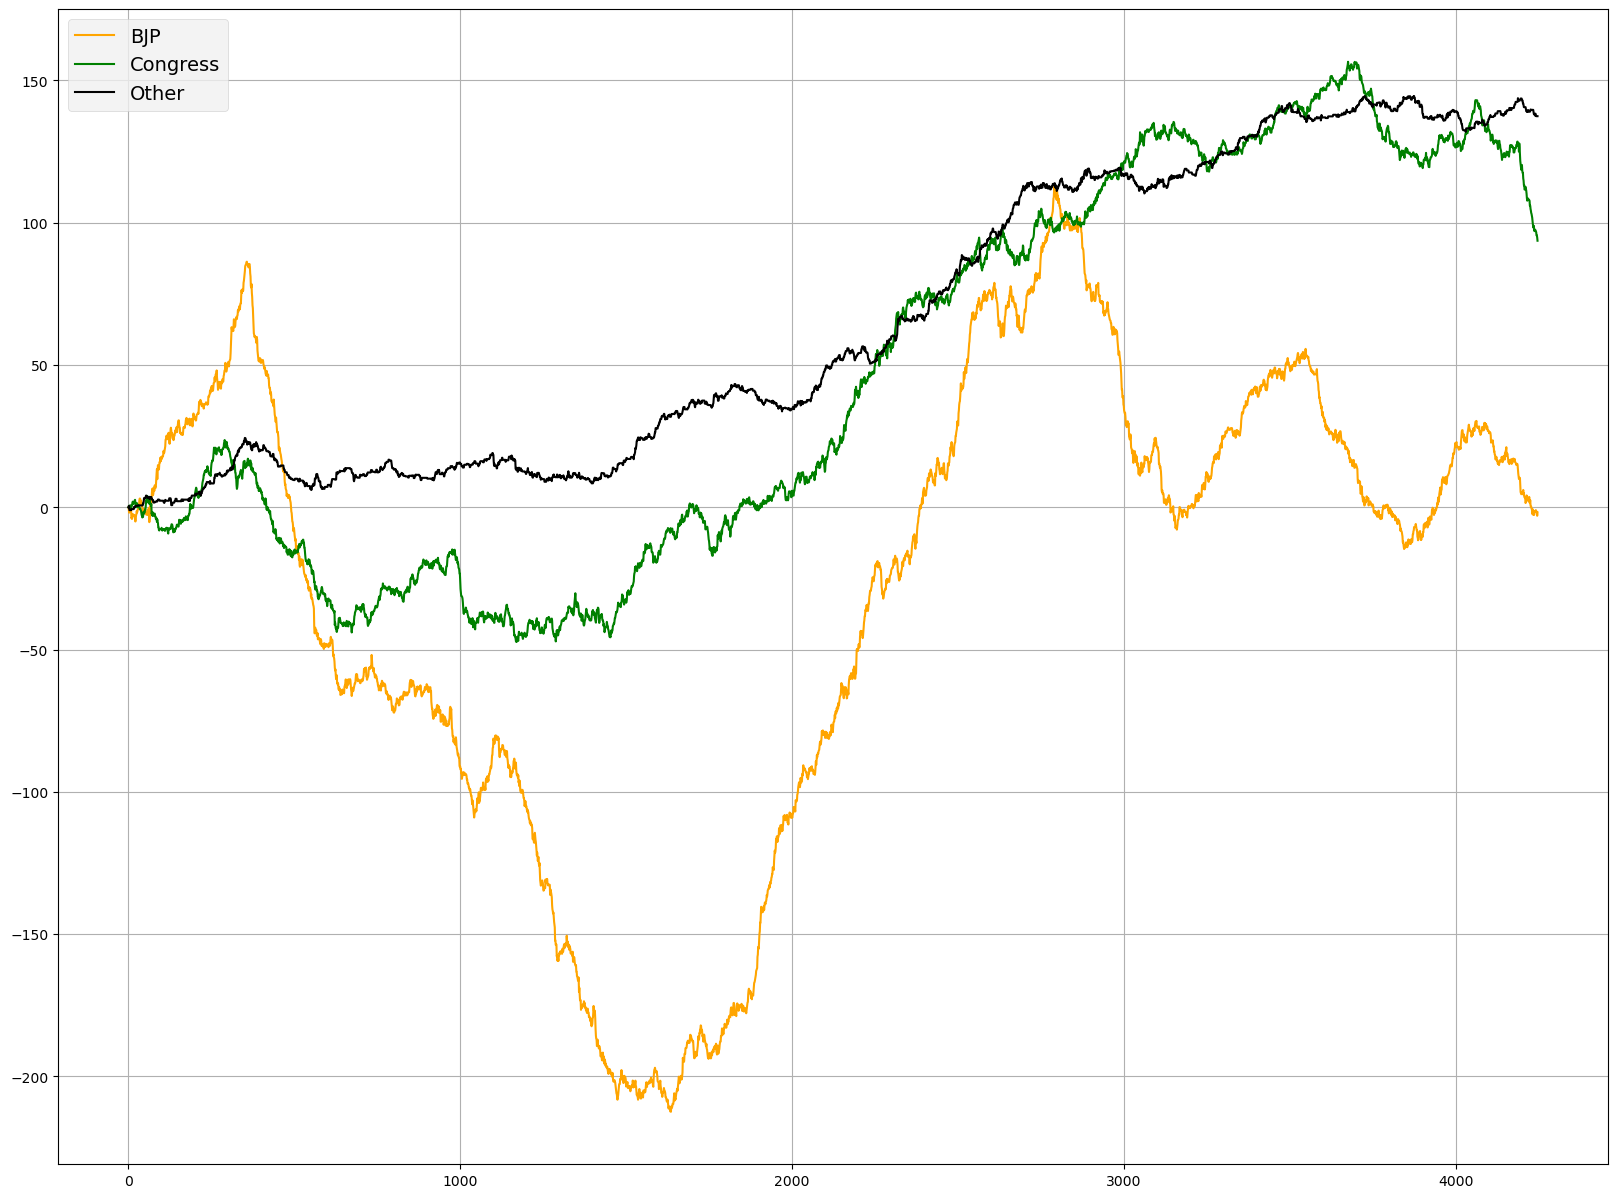

In [61]:
plt.rcParams["figure.figsize"] = [20,15]
plt.figure(num ='Lok Sabha')
plt.plot([i  for i in range(0,4248)],sec_total_bjp,label = 'BJP',color = 'orange')
plt.plot([i  for i in range(0,4248)],sec_total_cong,label = 'Congress',color = 'green')
plt.plot([i  for i in range(0,4248)],sec_total_other,label = 'Other',color = 'black')
plt.style.use('fivethirtyeight')
ax = plt.gca()
plt.grid(True)
plt.legend()
plt.show()
plt.close()

**Popularity per minute**

In [62]:
score_min = {}
for t in all_min:
    score_min[t] = {"BJP":0,"Congress":0,"Other":0}
for i in range(0,39874):
    t = df["last_updated"][i]
    score_min[(t.date(),t.hour,t.minute)][df["Party"][i]]+=df["Compound"][i]

In [63]:
min_total_bjp, min_total_cong, min_total_other = [],[],[]
for i in score_min:
    try:
        min_total_bjp.append(score_min[i]["BJP"]+min_total_bjp[-1])
    except IndexError:
        min_total_bjp.append(score_min[i]["BJP"]+0)

for i in score_min:
    try:
        min_total_cong.append(score_min[i]["Congress"]+min_total_cong[-1])
    except IndexError:
        min_total_cong.append(score_min[i]["Congress"]+0)

for i in score_min:
    try:
        min_total_other.append(score_min[i]["Other"]+min_total_other[-1])
    except IndexError:
        min_total_other.append(score_min[i]["Other"]+0)

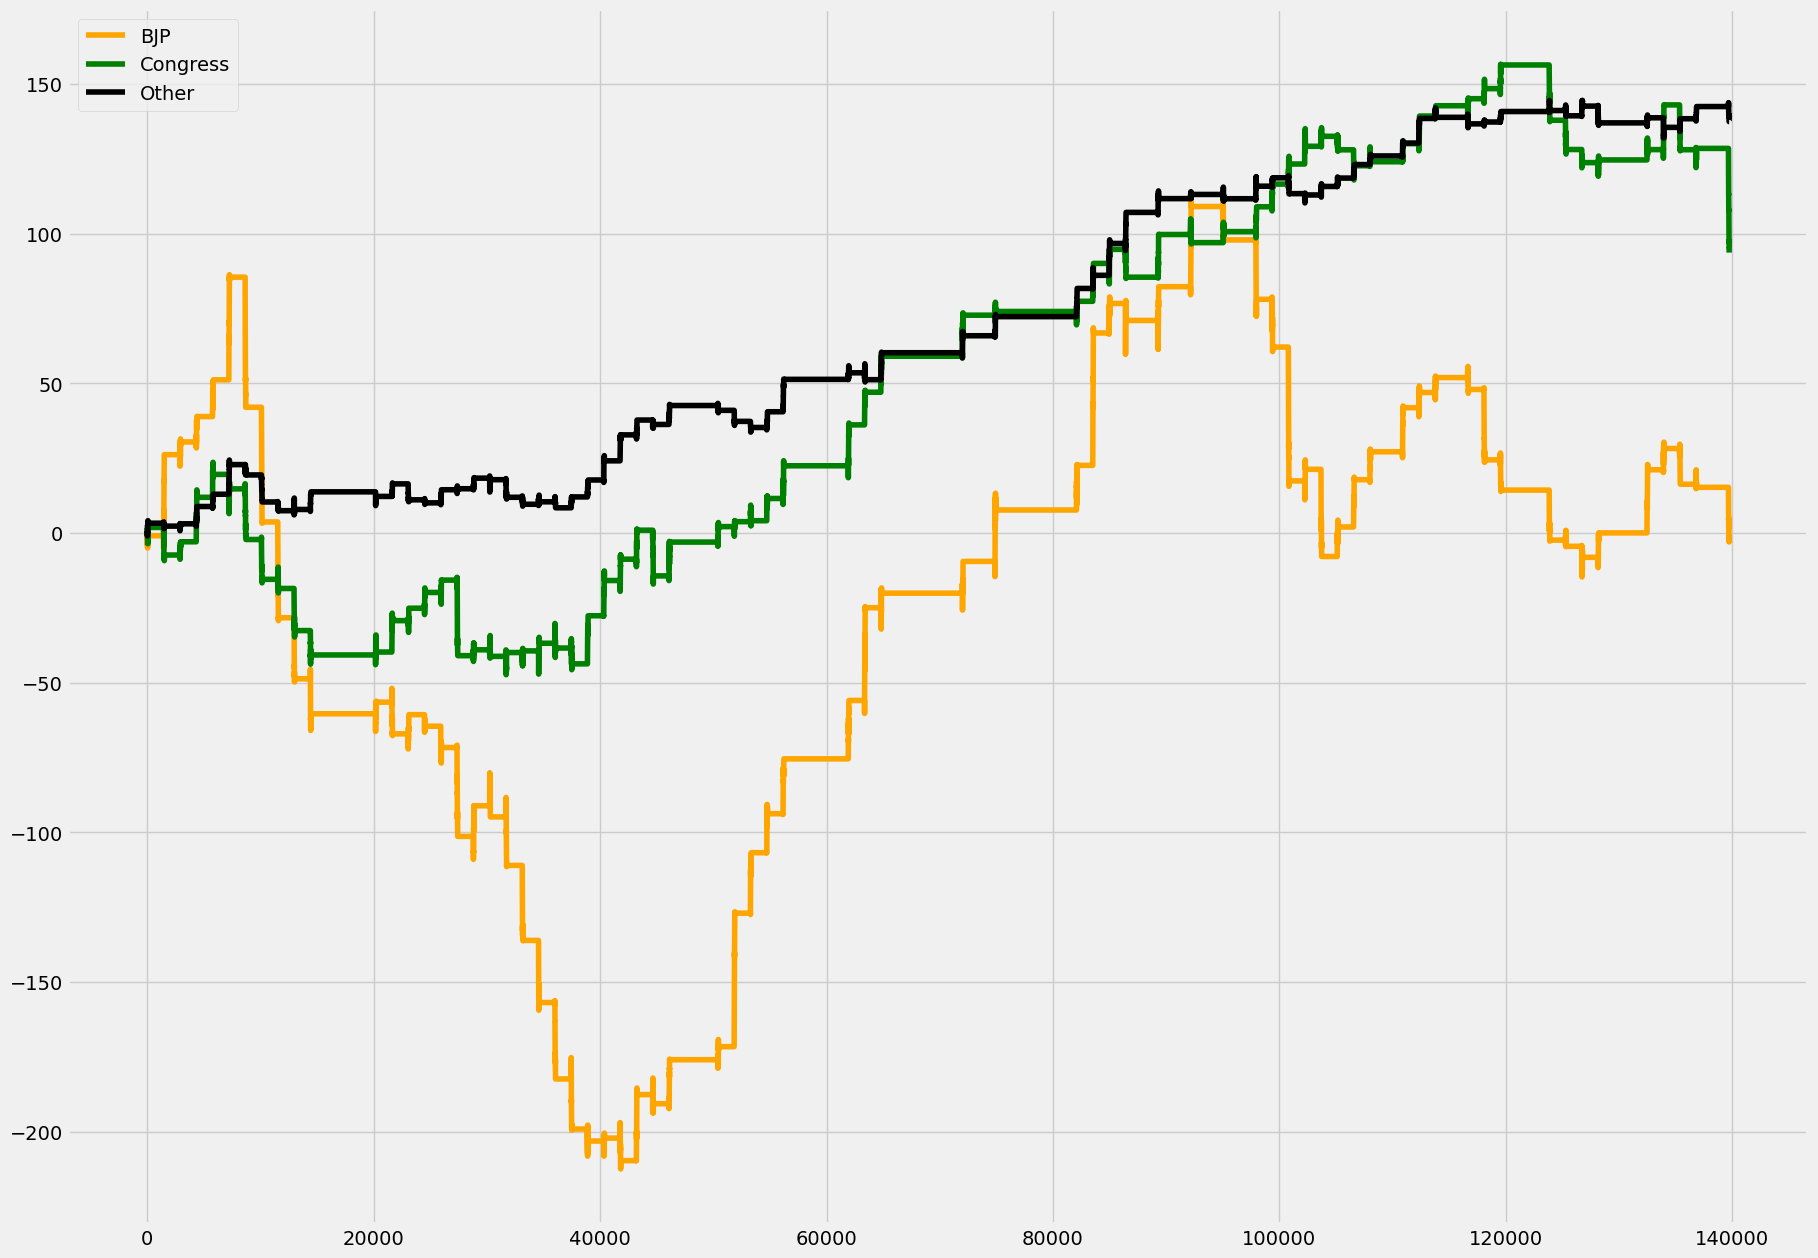

In [64]:
plt.rcParams["figure.figsize"] = [20,15]
plt.figure(num ='Lok Sabha')
plt.plot([i  for i in range(0,139741)],min_total_bjp,label = 'BJP',color = 'orange')
plt.plot([i  for i in range(0,139741)],min_total_cong,label = 'Congress',color = 'green')
plt.plot([i  for i in range(0,139741)],min_total_other,label = 'Other',color = 'black')
plt.style.use('fivethirtyeight')
ax = plt.gca()
plt.grid(True)
plt.legend()
plt.show()
plt.close()

**Popularity per hour**

In [65]:
score_hour = {}
for t in all_hour:
    score_hour[t] = {"BJP":0,"Congress":0,"Other":0}
for i in range(0,39874):
    t = df["last_updated"][i]
    score_hour[(t.date(),t.hour)][df["Party"][i]]+=df["Compound"][i]
hour_total_bjp, hour_total_cong, hour_total_other = [],[],[]
for i in score_hour:
    try:
        hour_total_bjp.append(score_hour[i]["BJP"]+hour_total_bjp[-1])
    except IndexError:
        hour_total_bjp.append(score_hour[i]["BJP"]+0)

for i in score_hour:
    try:
        hour_total_cong.append(score_hour[i]["Congress"]+hour_total_cong[-1])
    except IndexError:
        hour_total_cong.append(score_hour[i]["Congress"]+0)

for i in score_hour:
    try:
        hour_total_other.append(score_hour[i]["Other"]+hour_total_other[-1])
    except IndexError:
        hour_total_other.append(score_hour[i]["Other"]+0)

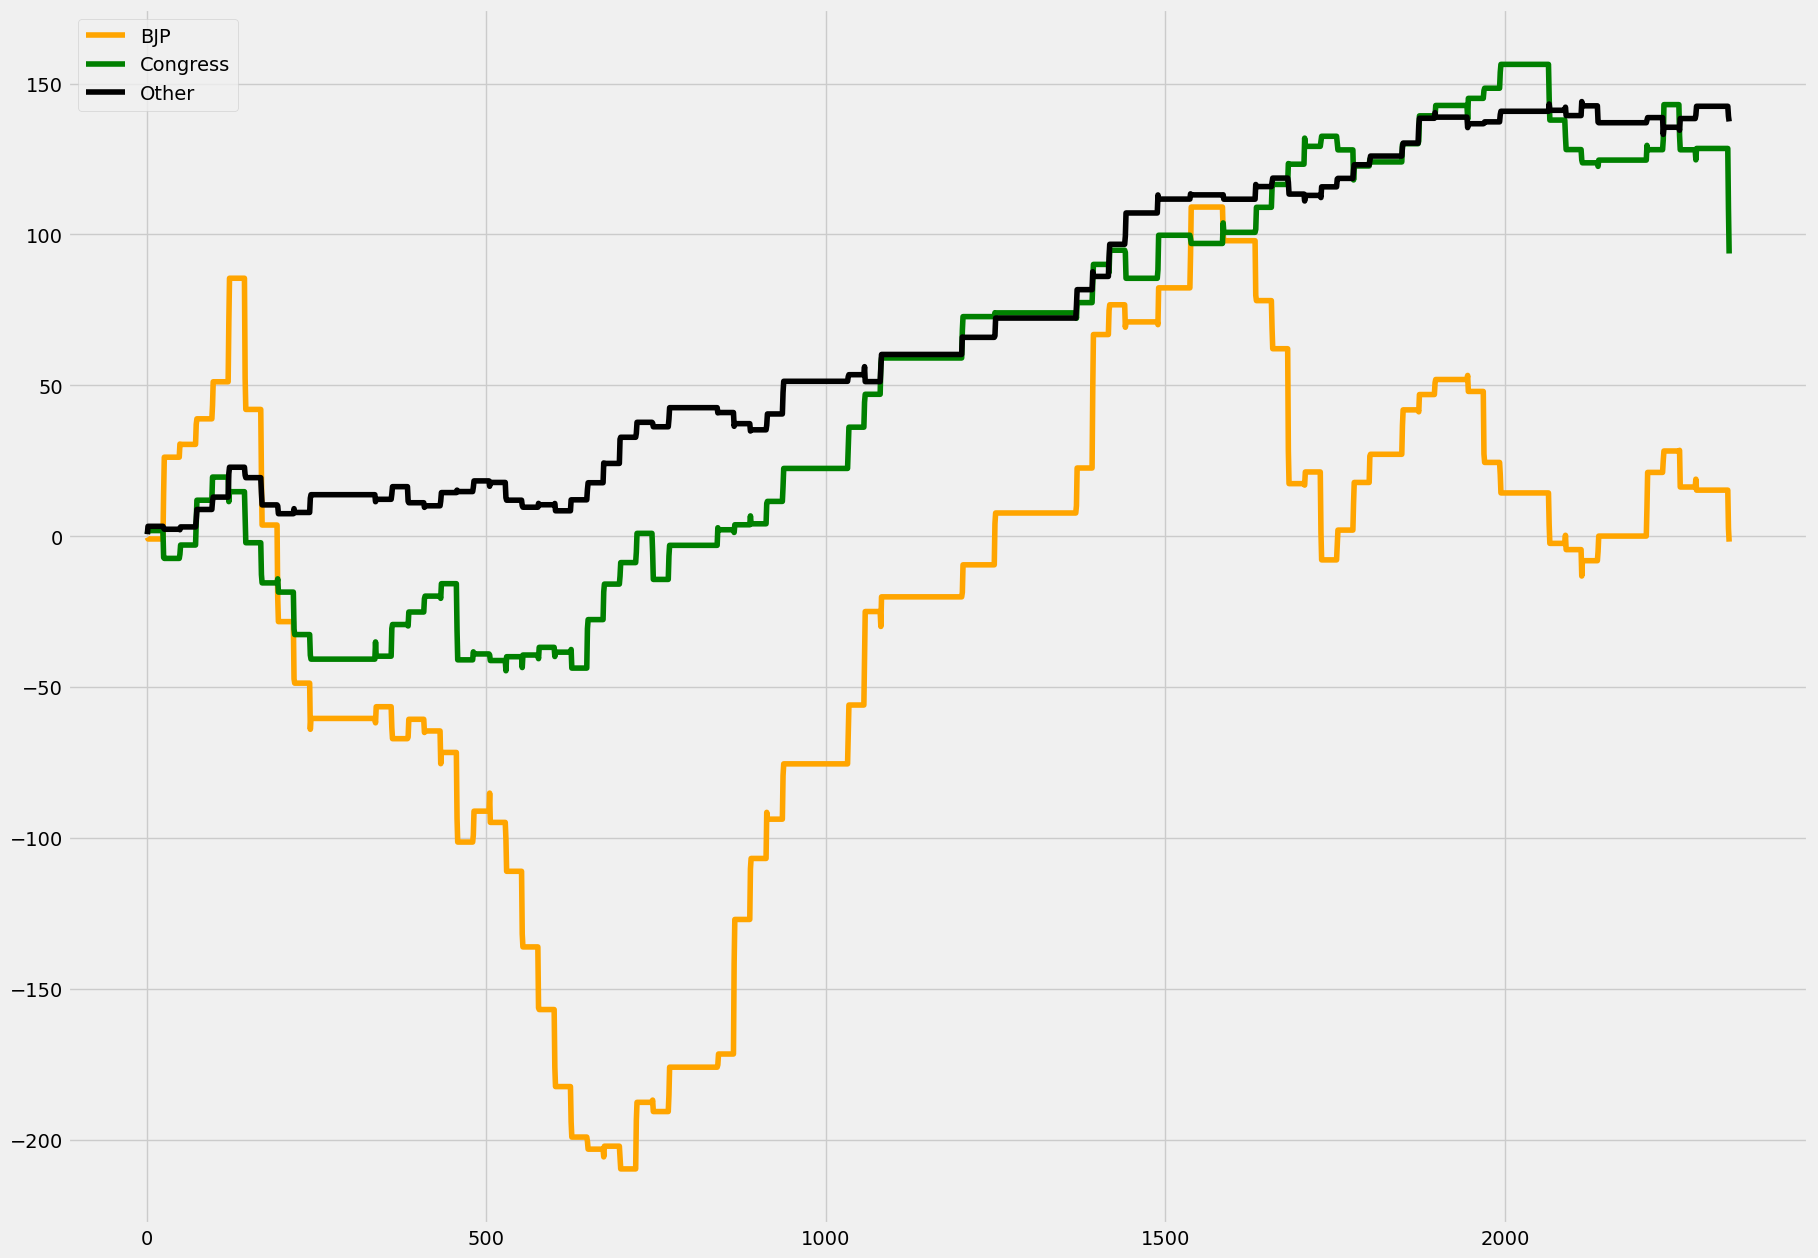

In [66]:
plt.rcParams["figure.figsize"] = [20,15]
plt.figure(num ='Lok Sabha')
plt.plot([i  for i in range(1,2331)],hour_total_bjp,label = 'BJP',color = 'orange')
plt.plot([i  for i in range(1,2331)],hour_total_cong,label = 'Congress',color = 'green')
plt.plot([i  for i in range(1,2331)],hour_total_other,label = 'Other',color = 'black')
plt.style.use('fivethirtyeight')
ax = plt.gca()
plt.grid(True)
plt.legend()
plt.show()
plt.close()

**Popularity per 100 days**

In [67]:
score_day = {}
all_days = []
result=time_day[0]
while result<= time_day[-1]:
    all_days.append(result)
    result+=timedelta(days=1)
#print(all_days)
for t in all_days:
    score_day[t] = {"BJP":0,"Congress":0,"Other":0}
for i in range(0,39874):
    t = df["last_updated"][i]
    score_day[t.date()][df["Party"][i]]+=df["Compound"][i]

In [68]:
day_total_bjp, day_total_cong, day_total_other = [],[],[]
for i in score_day:
    try:
        day_total_bjp.append(score_day[i]["BJP"]+day_total_bjp[-1])
    except IndexError:
        day_total_bjp.append(score_day[i]["BJP"]+0)

for i in score_day:
    try:
        day_total_cong.append(score_day[i]["Congress"]+day_total_cong[-1])
    except IndexError:
        day_total_cong.append(score_day[i]["Congress"]+0)

for i in score_day:
    try:
        day_total_other.append(score_day[i]["Other"]+day_total_other[-1])
    except IndexError:
        day_total_other.append(score_day[i]["Other"]+0)

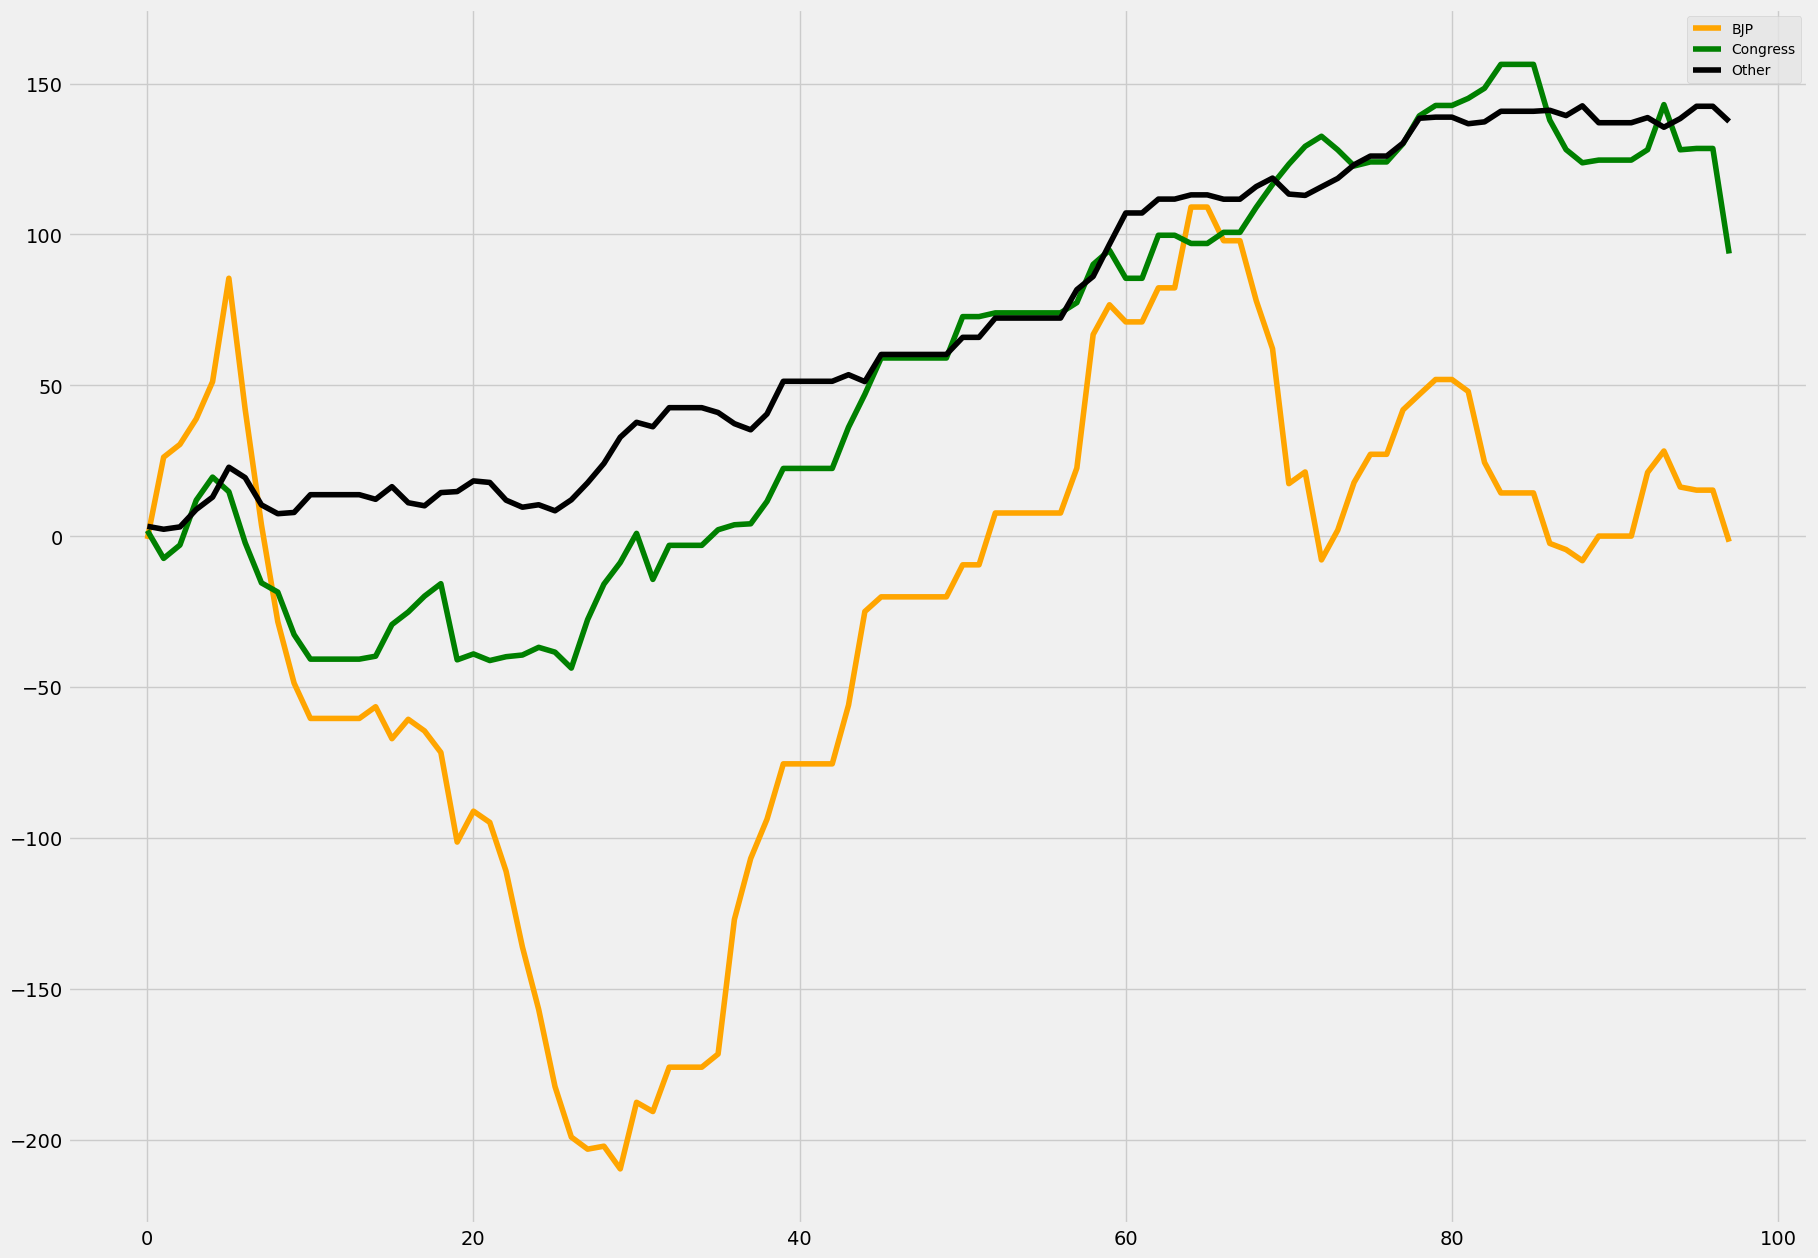

In [69]:
plt.rcParams["figure.figsize"] = [20,15]
plt.figure(num ='Lok Sabha')
plt.plot([i  for i in range(0,98)],day_total_bjp,label = 'BJP',color = 'orange')
plt.plot([i  for i in range(0,98)],day_total_cong,label = 'Congress',color = 'green')
plt.plot([i  for i in range(0,98)],day_total_other,label = 'Other',color = 'black')
plt.style.use('ggplot')
ax = plt.gca()
plt.grid(True)
plt.legend()
plt.show()
plt.close()

In [70]:
score_day = {}
all_days = []
result=time_day[0]
while result<= time_day[-1]:
    all_days.append(result)
    result+=timedelta(days=1)
#print(all_days)
for t in all_days:
    score_day[t] = {"BJP":0,"Congress":0,"Other":0}
for i in range(0,39874):
    t = df["last_updated"][i]
    score_day[t.date()][df["Party"][i]]+=df["Score"][i]

In [71]:
day_total_bjp, day_total_cong, day_total_other = [],[],[]
for i in score_day:
    try:
        day_total_bjp.append(score_day[i]["BJP"]+day_total_bjp[-1])
    except IndexError:
        day_total_bjp.append(score_day[i]["BJP"]+0)

for i in score_day:
    try:
        day_total_cong.append(score_day[i]["Congress"]+day_total_cong[-1])
    except IndexError:
        day_total_cong.append(score_day[i]["Congress"]+0)

for i in score_day:
    try:
        day_total_other.append(score_day[i]["Other"]+day_total_other[-1])
    except IndexError:
        day_total_other.append(score_day[i]["Other"]+0)

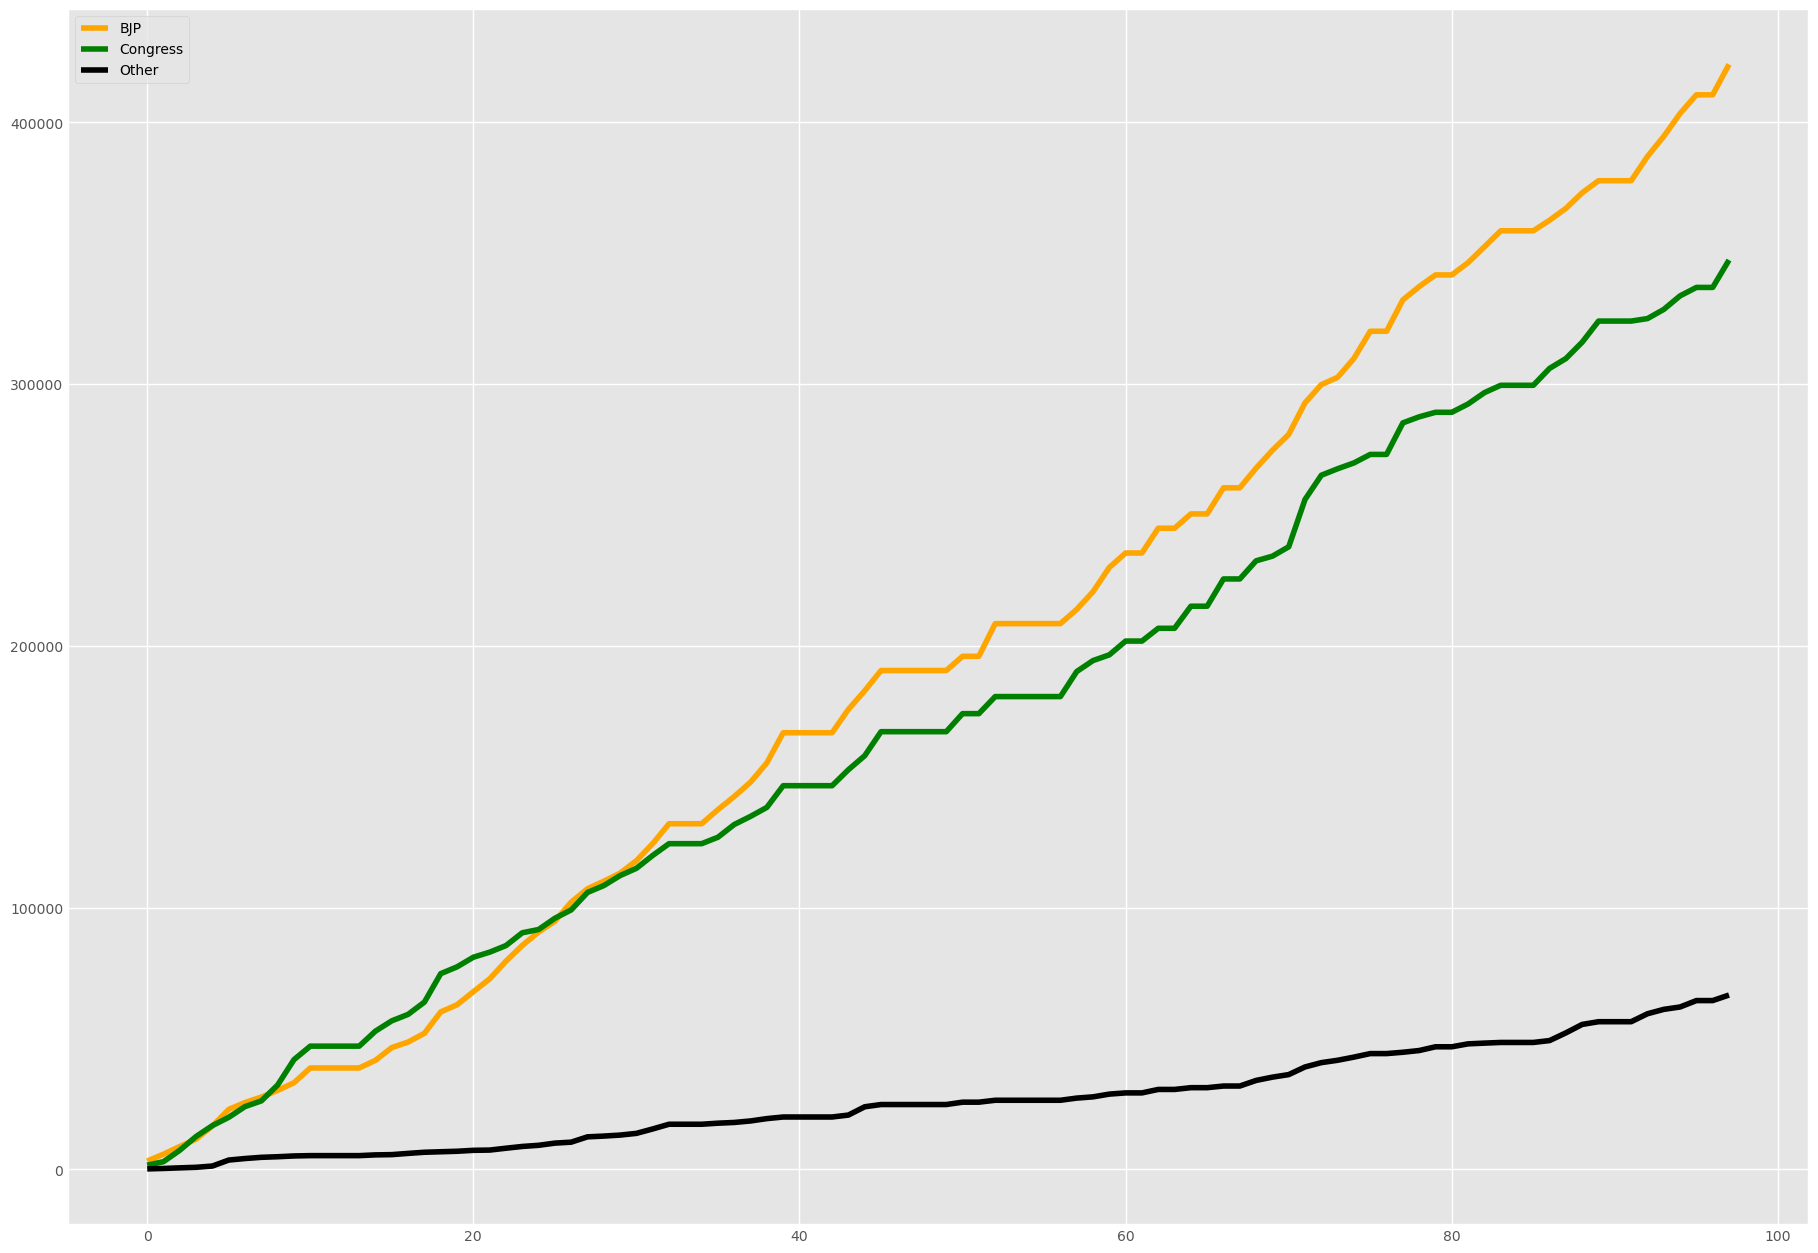

In [72]:
plt.rcParams["figure.figsize"] = [20,15]
plt.figure(num ='Lok Sabha')
plt.plot([i  for i in range(0,98)],day_total_bjp,label = 'BJP',color = 'orange')
plt.plot([i  for i in range(0,98)],day_total_cong,label = 'Congress',color = 'green')
plt.plot([i  for i in range(0,98)],day_total_other,label = 'Other',color = 'black')
plt.style.use('ggplot')
ax = plt.gca()
plt.grid(True)
plt.legend()
plt.show()
plt.close()

In [73]:
state_day_score = dict()
for i in set(list(df["State"])):
    if list(df["State"]).count(i)>500 and i!='':
        state_day_score[i]=dict()
        for t in all_days:
            state_day_score[i][t] = {"BJP":0,"Congress":0,"Other":0}
state_day_score["Other"]=dict()
for t in all_days:
            state_day_score["Other"][t] = {"BJP":0,"Congress":0,"Other":0}

In [74]:
for i in range(0,39874):
    t = df["last_updated"][i].date()
    st = df["State"][i]
    pty = df["Party"][i]
    cp = df["Score"][i]
    if st in state_day_score:
            state_day_score[st][t][pty]+=cp
    else:
        state_day_score["Other"][t][pty]+=cp

In [75]:
state_popularity = dict()
for i in state_day_score:
    state_popularity[i] = {"BJP":[],"Congress":[],"Other":[]}

for st in state_day_score:
    for t in state_day_score[st]:
        try:
            state_popularity[st]["BJP"].append(state_day_score[st][t]["BJP"]+state_popularity[st]["BJP"][-1])
        except IndexError:
            state_popularity[st]["BJP"].append(state_day_score[st][t]["BJP"]+0)
            
for st in state_day_score:
    for t in state_day_score[st]:
        try:
            state_popularity[st]["Congress"].append(state_day_score[st][t]["Congress"]+state_popularity[st]["Congress"][-1])
        except IndexError:
            state_popularity[st]["Congress"].append(state_day_score[st][t]["Congress"]+0)

for st in state_day_score:
    for t in state_day_score[st]:
        try:
            state_popularity[st]["Other"].append(state_day_score[st][t]["Other"]+state_popularity[st]["Other"][-1])
        except IndexError:
            state_popularity[st]["Other"].append(state_day_score[st][t]["Other"]+0)

In [76]:
del state_popularity["Other"]

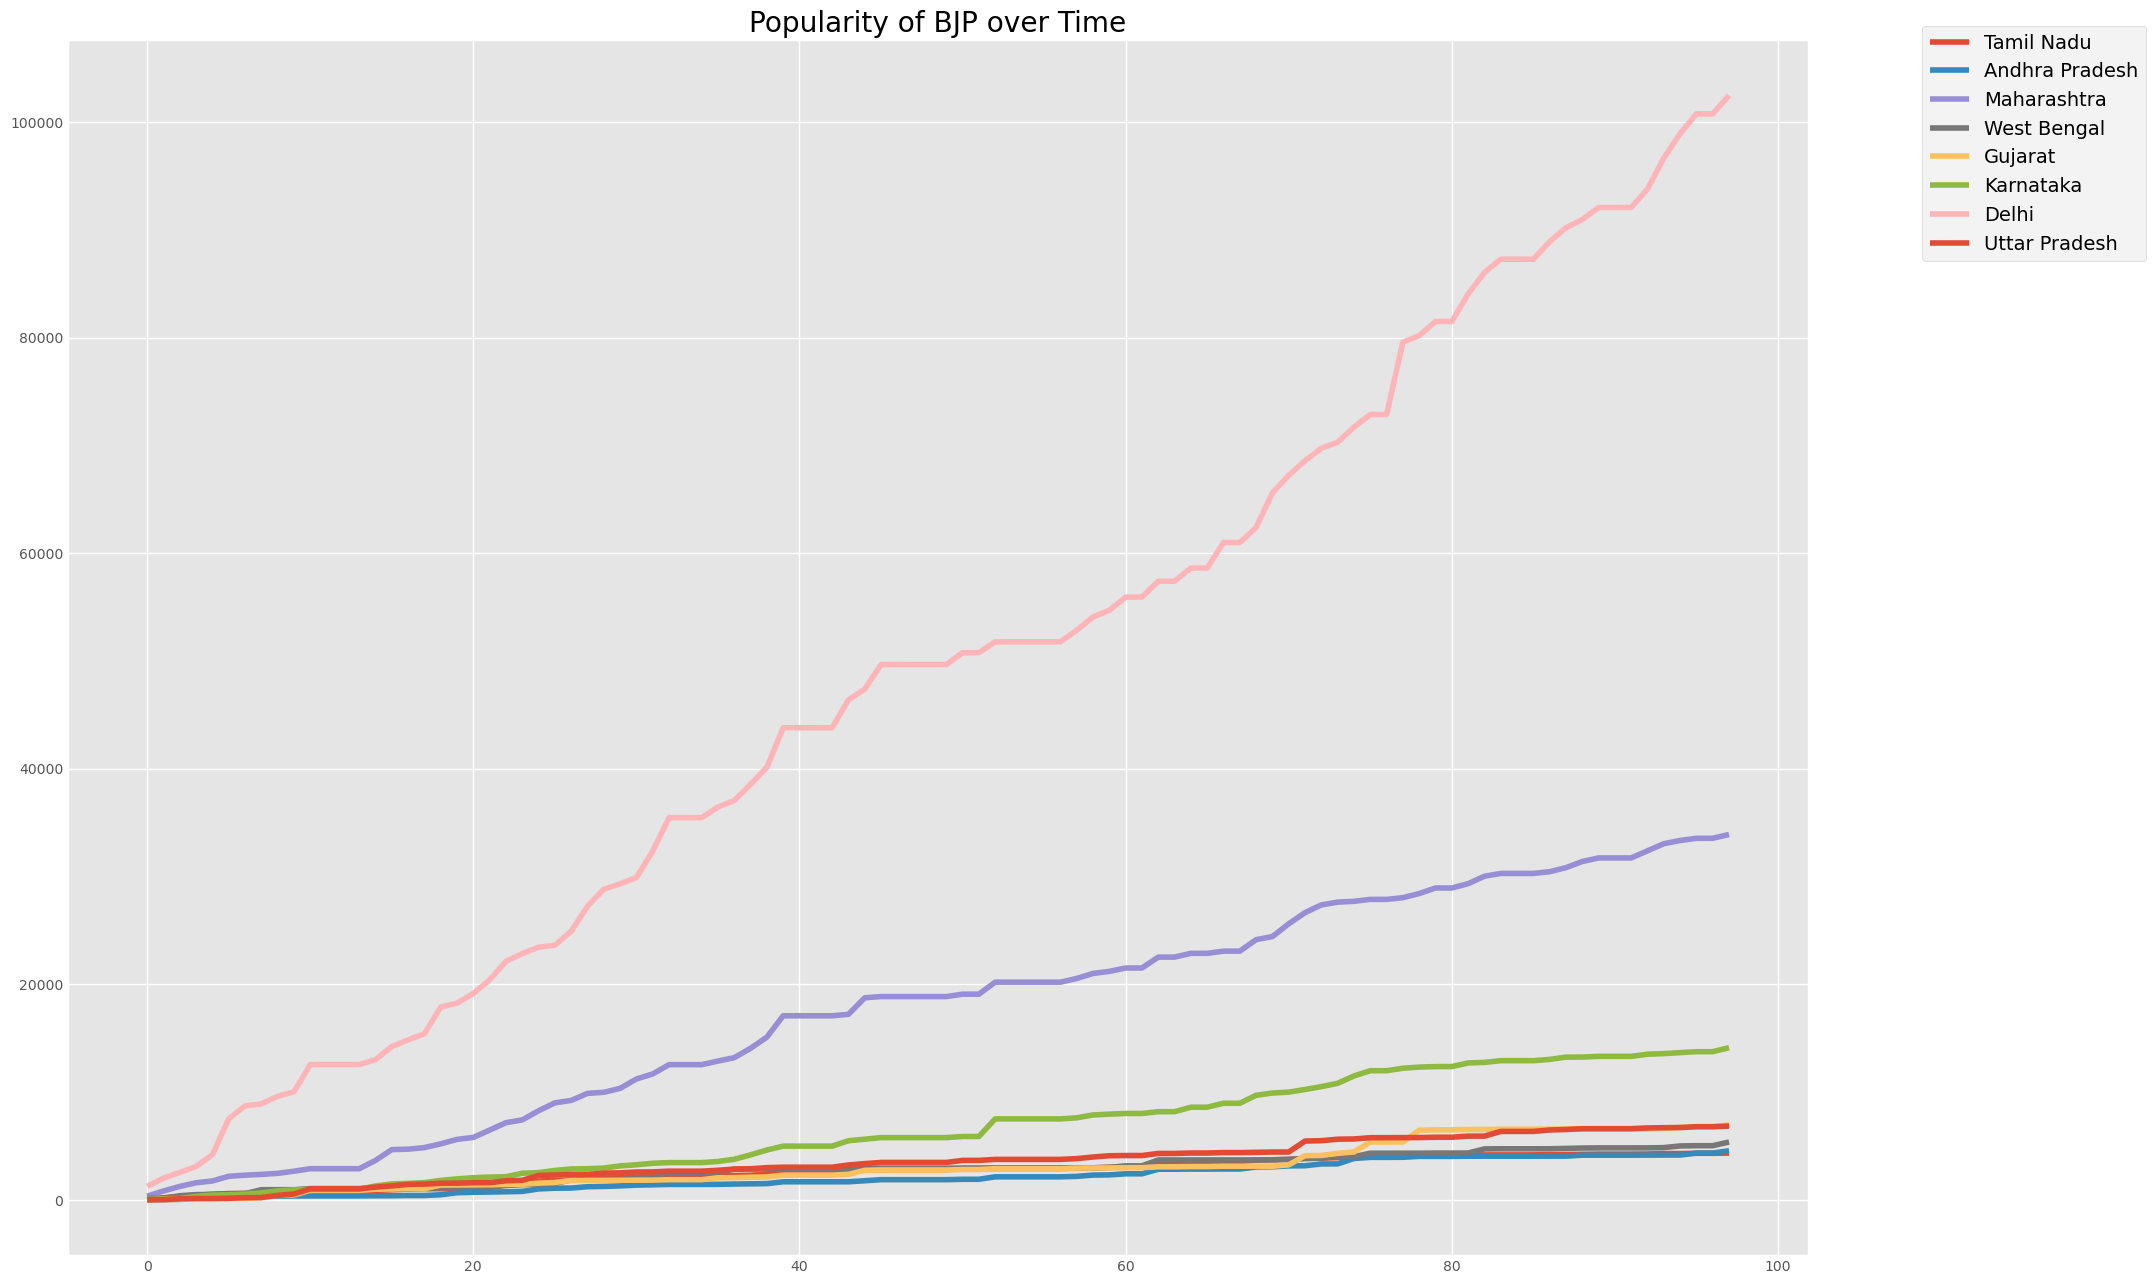

In [77]:
plt.rcParams["figure.figsize"] = [20,15]
plt.figure(num ='Lok Sabha')
#colors = ["red","blue","orange","purple","green","violet","pink","black","lightblue","lightgreen","darkred","grey"]
ctr=0
for i in state_popularity:
    plt.plot([i  for i in range(0,98)],state_popularity[i]["BJP"],label = i)
    ctr+=1
plt.style.use('fivethirtyeight')
#plt.figure(figsize=(20,20))
plt.title("Popularity of BJP over Time")
ax = plt.gca()
plt.grid(True)
plt.legend( loc='best', bbox_to_anchor=(1, 0,0.2, 1.02))
plt.show()
plt.close()

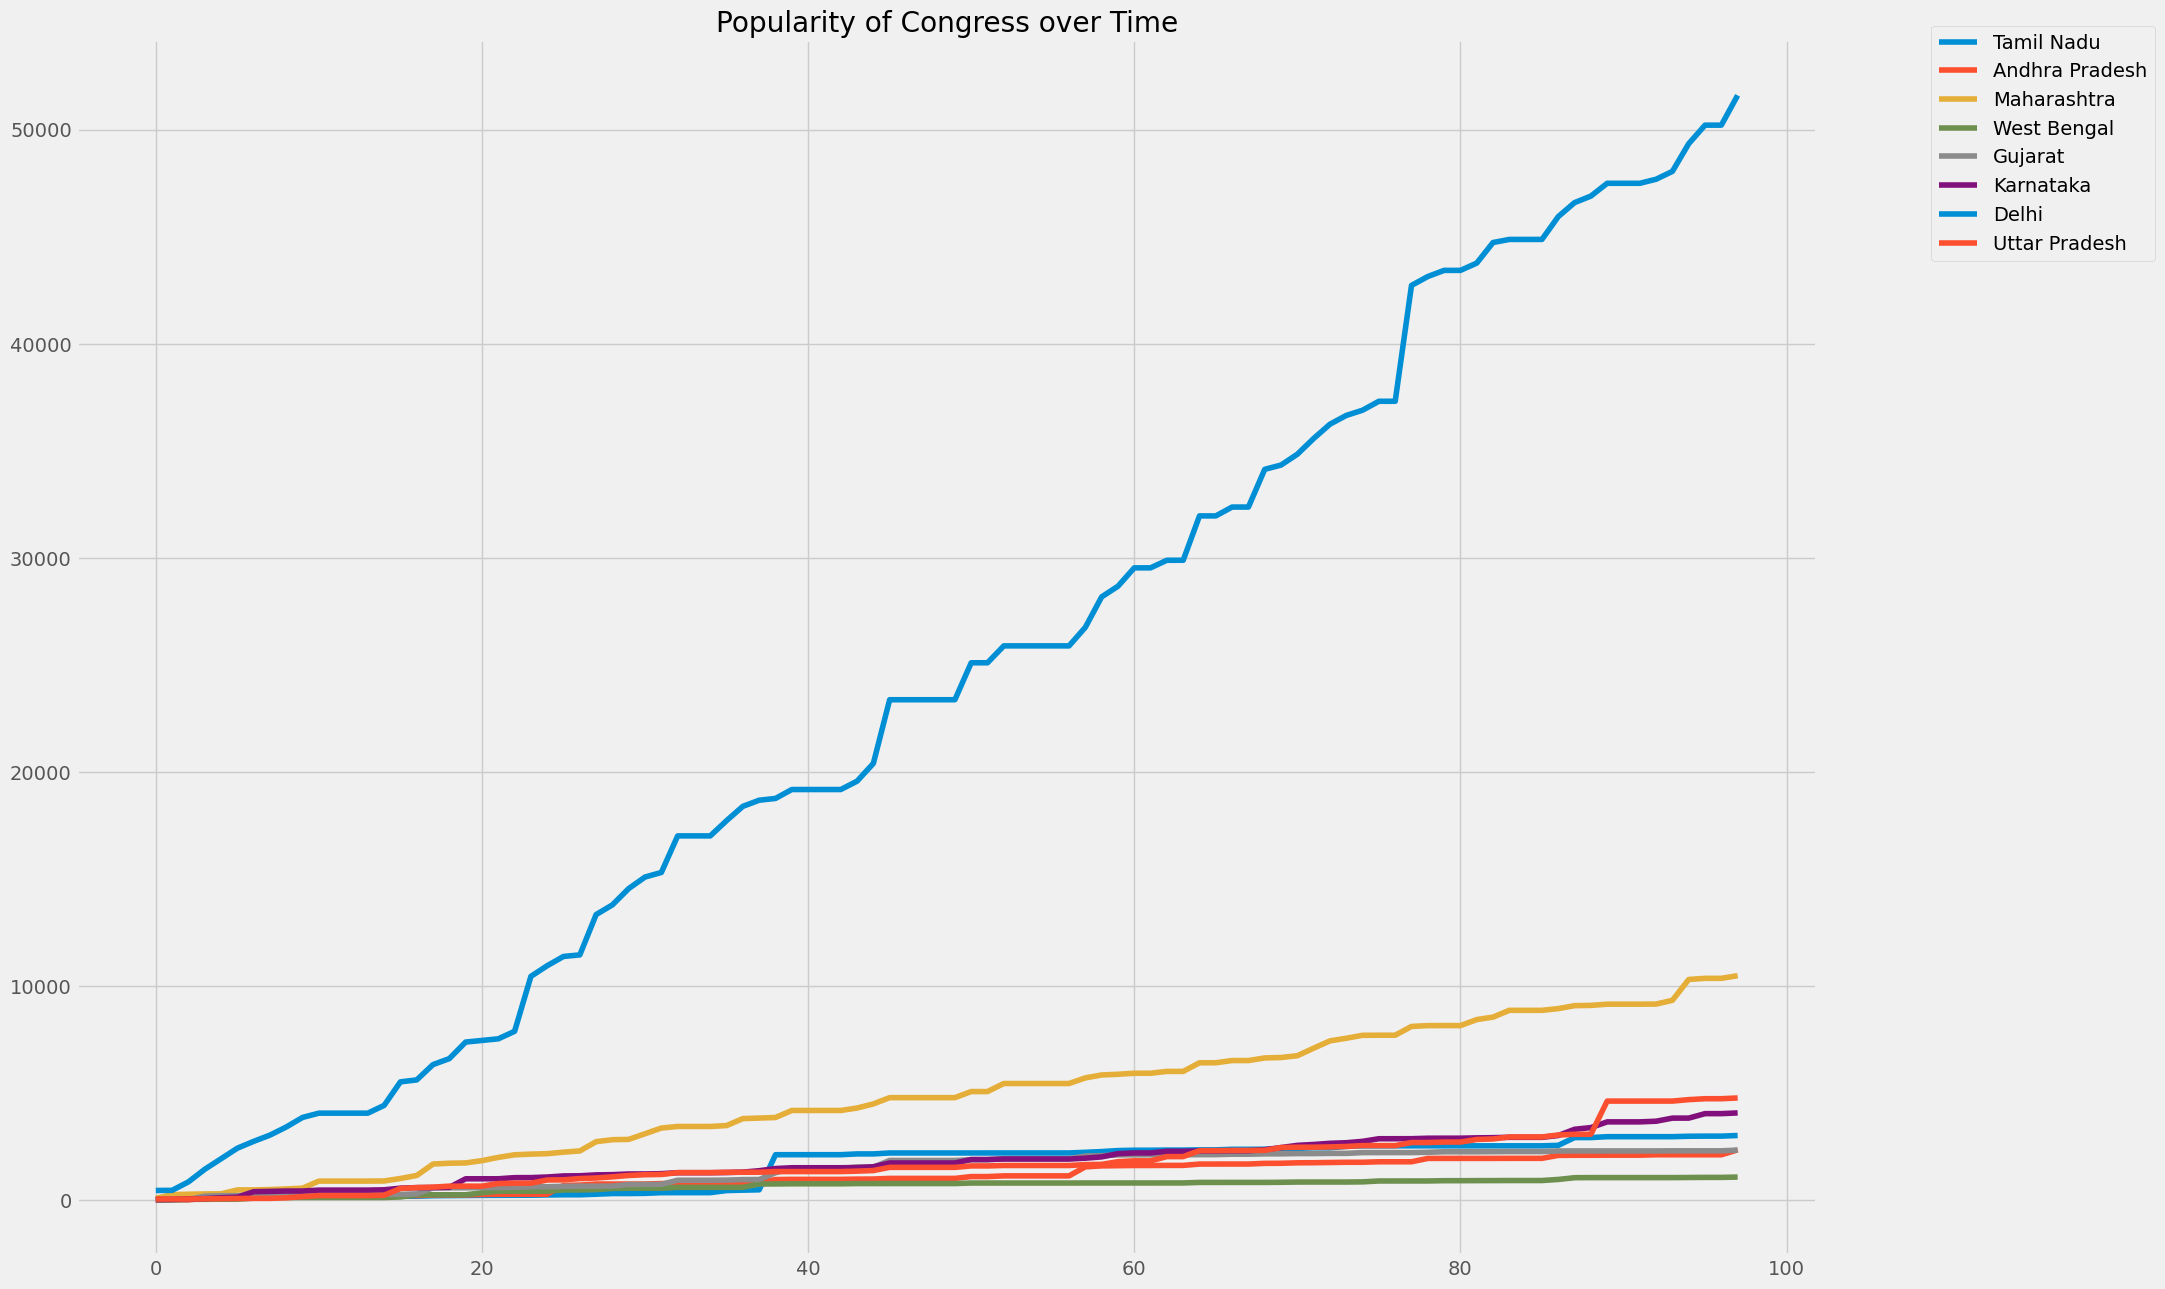

In [78]:
plt.figure(num ='Lok Sabha')
plt.rcParams["figure.figsize"] = [20,15]
for i in state_popularity:
    plt.plot([i  for i in range(0,98)],state_popularity[i]["Congress"],label = i)
plt.style.use('fivethirtyeight')
#plt.figure(figsize=(20,20))
plt.title("Popularity of Congress over Time")
ax = plt.gca()
plt.grid(True)
plt.legend( loc='best', bbox_to_anchor=(1, 0,0.2, 1.02))
plt.show()
plt.close()

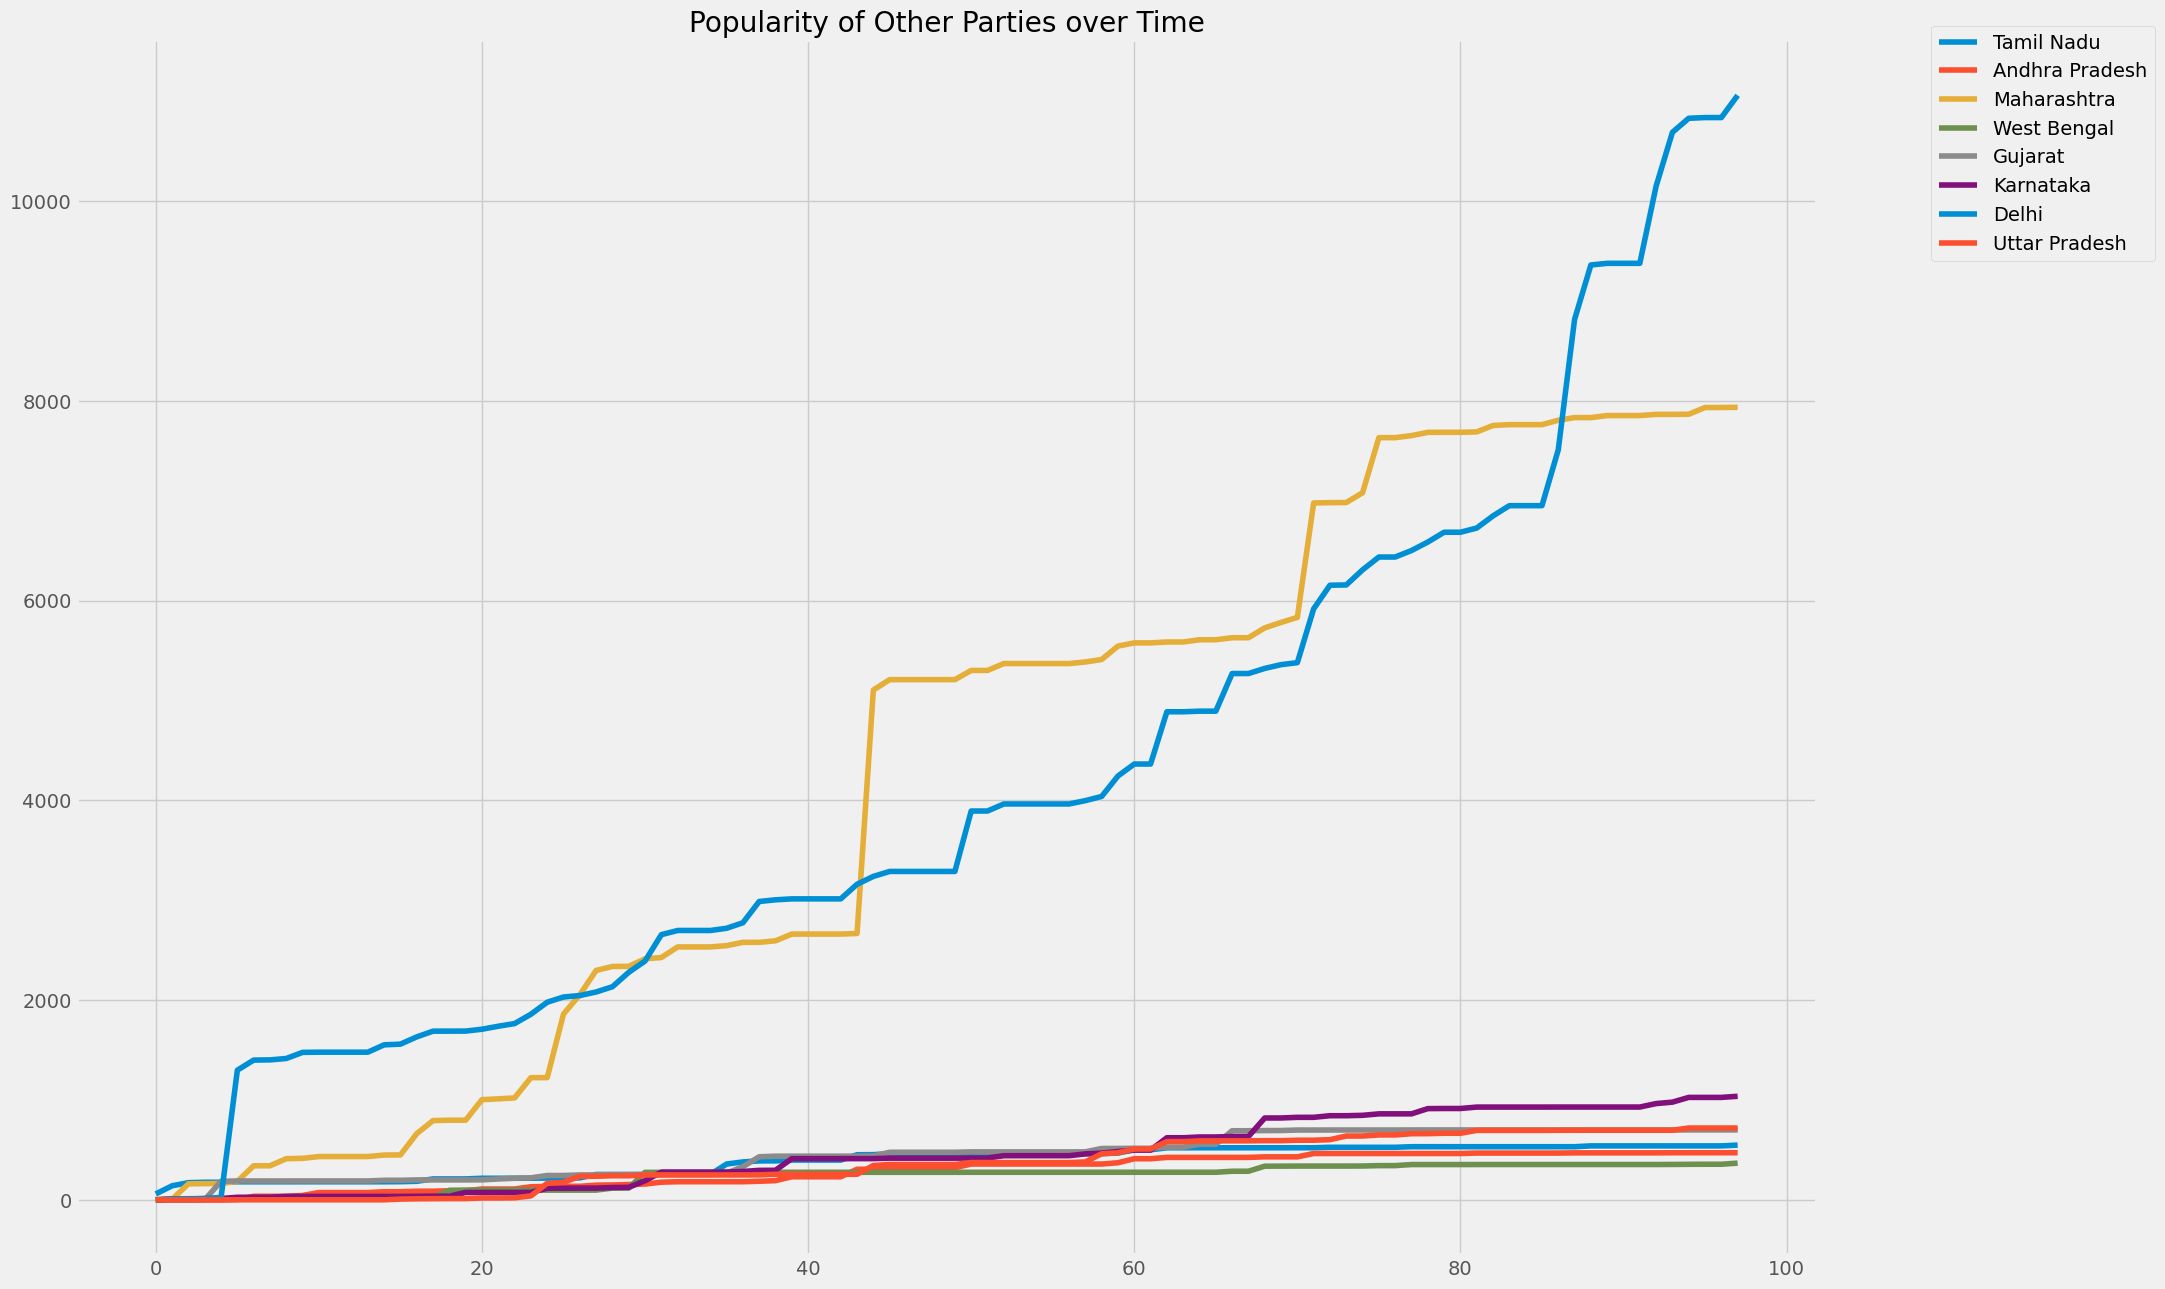

In [79]:
plt.figure(num ='Lok Sabha')
plt.rcParams["figure.figsize"] = [20,15]
for i in state_popularity:
    plt.plot([i  for i in range(0,98)],state_popularity[i]["Other"],label = i)
plt.style.use('fivethirtyeight')
#plt.figure(figsize=(20,20))
ax = plt.gca()
plt.grid(True)
plt.title("Popularity of Other Parties over Time")
plt.legend( loc='best', bbox_to_anchor=(1, 0,0.2, 1.02))
plt.show() 
plt.close()

**Plotting Final Popularity before Results**

Text(0.5, 1.0, 'Final Popularity Index')

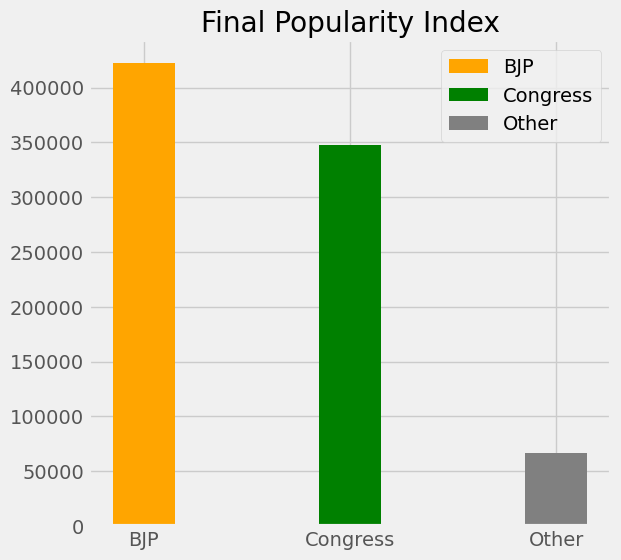

In [80]:
plt.rcParams["figure.figsize"] = [6,6]
x = matplotlib.pyplot.bar(["BJP","Congress","Other"],[max(day_total_bjp),max(day_total_cong),max(day_total_other)],width=0.3,color=["Orange","green","grey"])
plt.legend([x[0],x[1],x[2]],["BJP","Congress","Other"])
plt.title("Final Popularity Index")

In [94]:
pip install PyShp

  Obtaining dependency information for PyShp from https://files.pythonhosted.org/packages/98/2f/68116db5b36b895c0450e3072b8cb6c2fac0359279b182ea97014d3c8ac0/pyshp-2.3.1-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/56.0 kB ? eta -:--:--
     ------- -------------------------------- 10.2/56.0 kB ? eta -:--:--
     -------------------- ----------------- 30.7/56.0 kB 330.3 kB/s eta 0:00:01
     ---------------------------------- --- 51.2/56.0 kB 375.8 kB/s eta 0:00:01
     -------------------------------------- 56.0/56.0 kB 365.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/46.5 kB ? eta -:--:--
   -------- ------------------------------- 10.2/46.5 kB ? eta -:--:--
   ---------------------------------------- 46.5/46.5 kB 576.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [81]:
fp1 = r"C:\\Users\aleky\Downloads\INDIA\IND_adm1.shp"
map_df1 = gpd.read_file(fp1)

In [82]:
count = dict(df["State"].value_counts())
states = list(count.keys())
states.remove("")

In [83]:
geo=[]
for i in states:
    for j in range(0,36):
        name1 = i
        name2 = map_df1["NAME_1"][j]
        if(name1==name2):
            geo.append(map_df1["geometry"][j])
            break
        elif len(set(name1.split()).intersection(set(name2.split())))>1:
            geo.append(map_df1["geometry"][j])
            break
        elif name2=="Puducherry" and name1 == "Pondicherry":
            geo.append(map_df1["geometry"][j])
            break

In [85]:
bjp,cong,other,party,tweets,bjppop,congpop,opop=[],[],[],[],[],[],[],[]
partycount = dict()
for i in states:
    partycount[i] = {"BJP":0,"Congress":0,"Other":0,"BJPPop":0,"CongPop":0,"OtherPop":0,
                     'narendramodi':0,'bjp4india':0,'incindia':0,'rahulgandhi':0,
                    "htmodi":0,'htbjp':0,'htloksabha':0,'htcong':0,'htrahulgandhi':0,'htchow':0}

In [86]:
for i in range(0,39874):
    p = df["Party"][i]
    s = df["State"][i]
    cp = df["Compound"][i]
    temp = df["hashtags"][i]
    user = df["user_mentions_screen_name"][i]
    if s=="":
        continue
    partycount[s][p]+=1
    if p=="BJP":
        partycount[s]["BJPPop"]+=cp
    if p=="Congress":
        partycount[s]["CongPop"]+=cp
    if p=="Other":
        partycount[s]["OtherPop"]+=cp
    for hst in temp.split(','):
        if hst =="BJP":
            partycount[s]['htbjp']+=1
        if hst =="Modi":
            partycount[s]['htmodi']+=1
        if hst =="LokSabhaElections2019":
            partycount[s]['htloksabha']+=1
        if hst =="Congress":
            partycount[s]['htcong']+=1
        if hst =="RahulGandhi":
            partycount[s]['htrahulgandhi']+=1
        if hst =="MainBhiChowkidar":
            partycount[s]['htchow']+=1
    for x in user.split(','):
        if x=="BJP4India":
            partycount[s]['bjp4india']+=1
        if x=="narendramodi":
            partycount[s]['narendramodi']+=1
        if x=="INCIndia":
            partycount[s]['incindia']+=1
        if x=="RahulGandhi":
            partycount[s]['rahulgandhi']+=1          

In [87]:
htbjp,htmodi,htls,htcong,htrg,htchow = [],[],[],[],[],[]
hdbjp,hdmodi,hdcong,hdrg=[],[],[],[]

for i in partycount:
    bjp.append(partycount[i]["BJP"])
    cong.append(partycount[i]["Congress"])
    other.append(partycount[i]["Other"])
    tweets.append(partycount[i]["BJP"]+partycount[i]["Congress"]+partycount[i]["Other"])
    bjppop.append(partycount[i]["BJPPop"])
    congpop.append(partycount[i]["CongPop"])
    opop.append(partycount[i]["OtherPop"])
    
    htbjp.append(partycount[i]['htbjp'])
    htmodi.append(partycount[i]['htmodi'])
    htls.append(partycount[i]['htloksabha'])
    htcong.append(partycount[i]['htcong'])
    htrg.append(partycount[i]['htrahulgandhi'])
    htchow.append(partycount[i]['htchow'])
    
    hdbjp.append(partycount[i]['bjp4india'])
    hdmodi.append(partycount[i]['narendramodi'])
    hdcong.append(partycount[i]['incindia'])
    hdrg.append(partycount[i]['rahulgandhi'])
    
    if partycount[i]["BJPPop"]>partycount[i]["CongPop"] and partycount[i]["BJPPop"]>partycount[i]["OtherPop"]:
        party.append("BJP")
    elif partycount[i]["BJPPop"]<partycount[i]["CongPop"] and partycount[i]["OtherPop"]<partycount[i]["CongPop"]:
        party.append("Congress")
    else:
        party.append("Other")

In [88]:
testdf = pd.DataFrame({"State":states,"Tweets":tweets,"Geo":geo,"Party":party,"BJP":bjp,"Congress":cong,"Other":other,
                      "BJPPop":bjppop,"Congpop":congpop,"OtherPop":opop,
                      "#BJP":htbjp,"#Modi":htmodi,"#LokSabhaElections2019":htls,"#Congress":htcong,"#RahulGandhi":htrg,"#MainBhiChowkidar":htchow,
                      "@BJP4India":hdbjp,"@narendramodi":hdmodi,"@INCIndia":hdcong,"@RahulGandhi":hdrg})
testdf.head()

,State,Tweets,Geo,Party,BJP,Congress,Other,BJPPop,Congpop,OtherPop,#BJP,#Modi,#LokSabhaElections2019,#Congress,#RahulGandhi,#MainBhiChowkidar,@BJP4India,@narendramodi,@INCIndia,@RahulGandhi
0,Delhi,4320,"POLYGON ((77.327133178711 28.68515968322754, 7...",Other,2671,1206,443,11.7668,11.3243,12.8376,38,14,37,28,19,10,77,312,139,205
1,Maharashtra,2852,MULTIPOLYGON (((73.45597076416021 15.889862060...,Congress,1837,736,279,-11.2046,31.4115,12.2441,31,44,15,15,4,5,62,226,133,166
2,Karnataka,1587,MULTIPOLYGON (((74.67097473144554 13.199861526...,Congress,1055,395,137,10.7177,23.2182,8.2489,7,5,5,5,7,9,28,141,68,94
3,Uttar Pradesh,975,"POLYGON ((77.58467864990263 30.4087810516358, ...",BJP,627,252,96,9.3838,3.8522,-3.5447,7,4,4,2,1,5,42,125,43,57
4,Tamil Nadu,946,MULTIPOLYGON (((77.55596160888689 8.0790309906...,BJP,682,192,72,25.6935,-0.6582,1.9070,18,12,3,5,2,3,39,87,24,26


In [89]:
gdf = gpd.GeoDataFrame(testdf, geometry="Geo")

Text(0.5, 1.0, 'States tweeting about BJP')

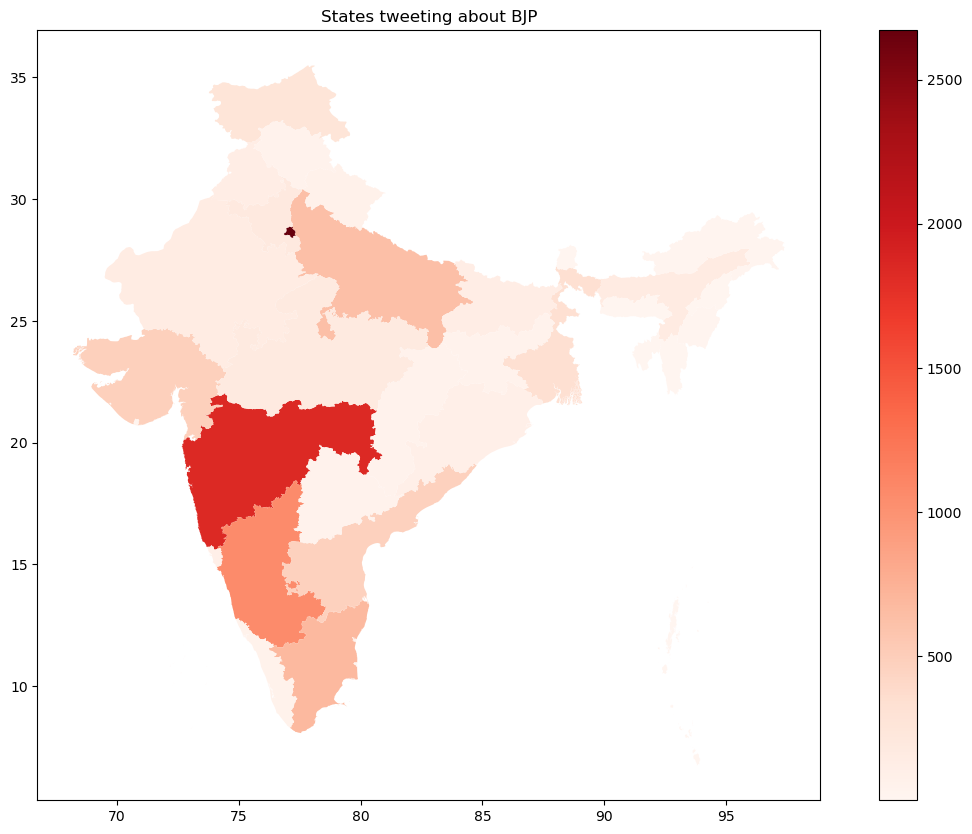

In [90]:
plt.style.use('default')
plt.rcParams["figure.figsize"] = [15,10]
gdf.plot(column="BJP",legend = True,cmap="Reds")
plt.title("States tweeting about BJP")

Text(0.5, 1.0, 'States tweeting about Congress')

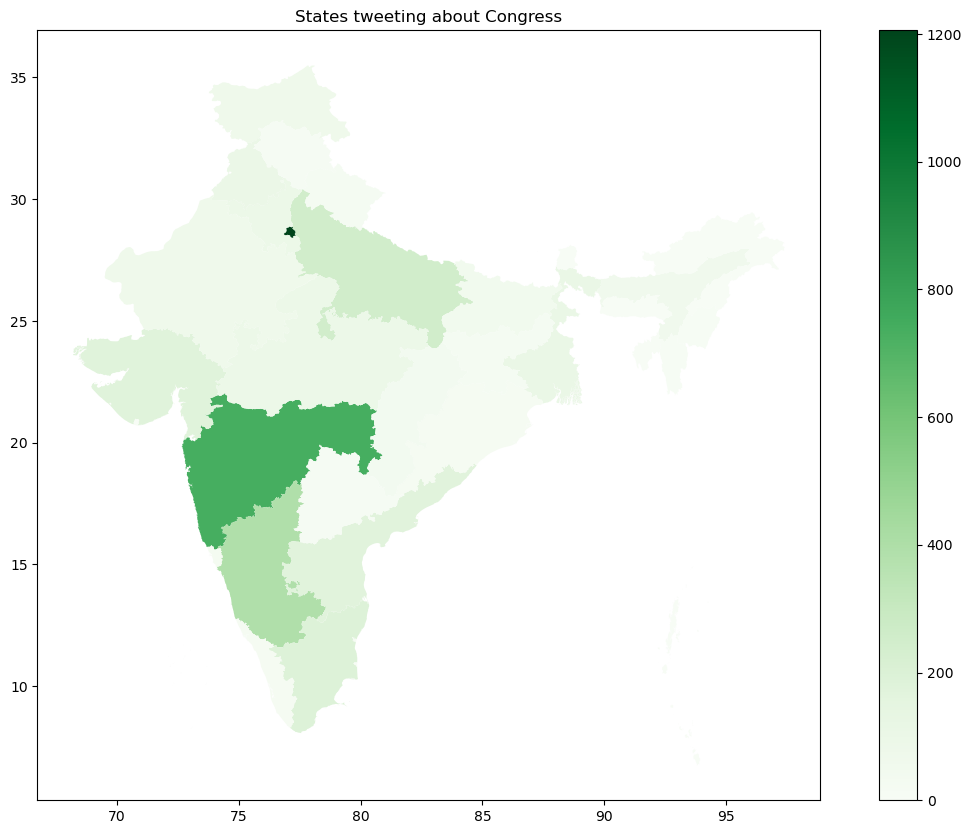

In [91]:
plt.style.use('default')
plt.rcParams["figure.figsize"] = [15,10]
gdf.plot(column="Congress",legend = True,cmap="Greens")
plt.title("States tweeting about Congress")

Text(0.5, 1.0, 'States tweeting about Other Parties')

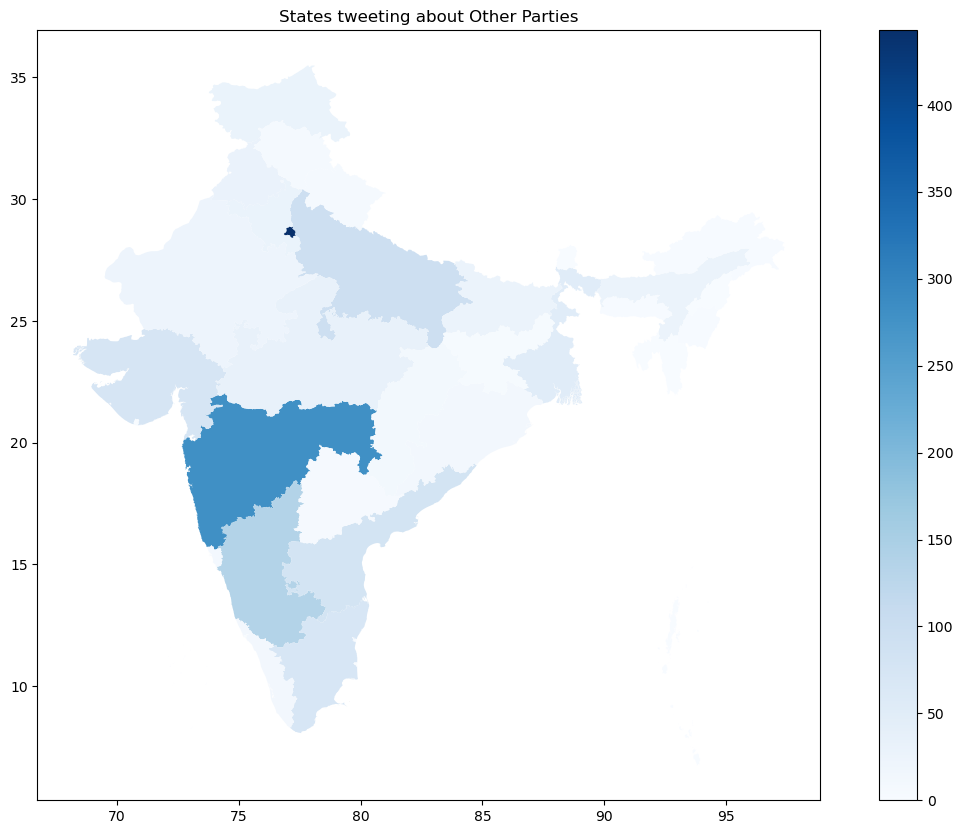

In [92]:
plt.style.use('default')
plt.rcParams["figure.figsize"] = [15,10]
gdf.plot(column="Other",legend = True,cmap = "Blues")
plt.title("States tweeting about Other Parties")

Text(0.5, 1.0, 'Popularity Trend Across States')

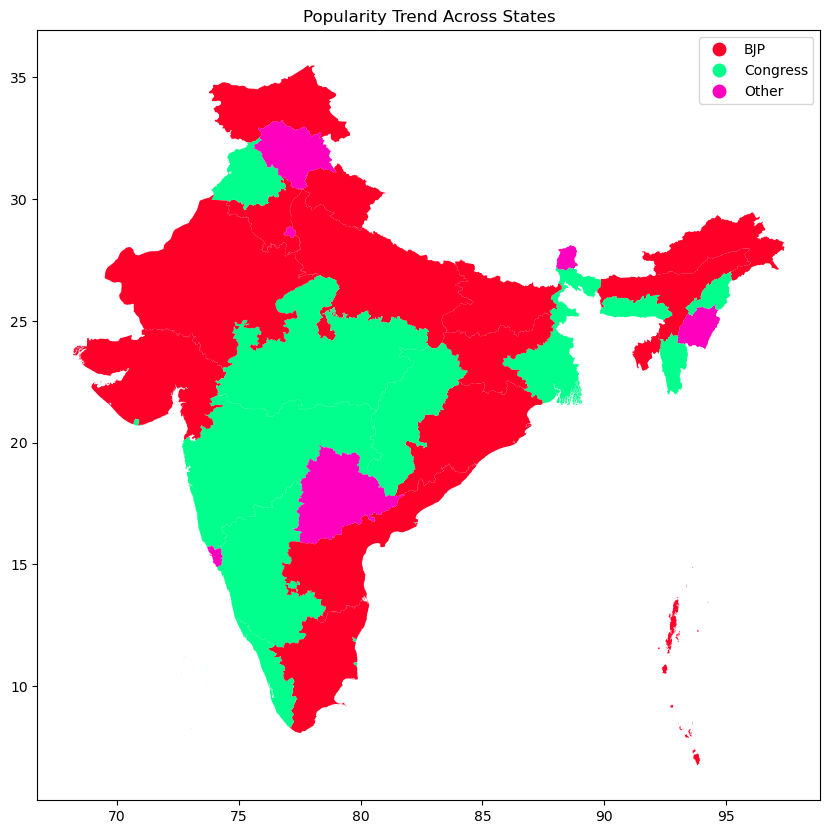

In [93]:
plt.style.use('default')
plt.rcParams["figure.figsize"] = [15,10]
gdf.plot(column="Party",legend = True,cmap="gist_rainbow")
plt.title("Popularity Trend Across States")

**Winning Popularity**

In [94]:
vote_score = dict()
for i in all_days:
  vote_score[i] = {"bjp_votes":0, "cong_votes":0, "other_votes":0, "cong_coal":0, "bjp_coal":0,"total":0}
#bjp_votes, cong_votes, other_votes, cong_coal, bjp_coal = [0 for i in range(5)]
total = 0
for i in range(0,39874):
  t = df["last_updated"][i].date()
  party = df["Party"][i]
  score = df["Score"][i]
  scoreadd=1
  if party=="BJP":
    if score>0:
      vote_score[t]["bjp_votes"]+=scoreadd
      vote_score[t]["total"]+=1
    else:
      if score >=-0.4 and score <=0:
        vote_score[t]["cong_coal"]+=scoreadd
        vote_score[t]["total"]+=1
      else:
        vote_score[t]["cong_votes"]+=scoreadd
        vote_score[t]["total"]+=1
  elif party=="Congress":
    if score>0:
      vote_score[t]["cong_votes"]+=scoreadd
      vote_score[t]["total"]+=1
    else:
      if score >=-0.4 and score <=0:
        vote_score[t]["bjp_coal"]+=scoreadd
        vote_score[t]["total"]+=1
      else:
        vote_score[t]["bjp_votes"]+=scoreadd
        vote_score[t]["total"]+=1
  else:
    if score>0:
      vote_score[t]["other_votes"]+=scoreadd
      vote_score[t]["total"]+=1
    elif score >=-0.4 and score <=0:
      if vote_score[t]["bjp_votes"]>vote_score[t]["cong_votes"]:
        vote_score[t]["bjp_coal"]+=scoreadd
        vote_score[t]["total"]+=1
      else:
        vote_score[t]["cong_coal"]+=scoreadd
        vote_score[t]["total"]+=1

In [95]:
vote_bjp1, vote_cong1, vote_other1, vote_bjp_coal1, vote_cong_coal1 = [],[],[],[],[]
vote_bjp2, vote_cong2, vote_other2, vote_bjp_coal2, vote_cong_coal2 = [],[],[],[],[]
temp = dict()
for i in vote_score:
    if vote_score[i]["total"]!=0:
        temp[i] = vote_score[i]
vote_score=temp
for t in vote_score:
  if vote_score[t]['total']==0:
    continue
  vote_bjp1.append((vote_score[t]["bjp_votes"]/vote_score[t]["total"]))
  try:
    vote_bjp2.append((vote_score[t]["bjp_votes"]+vote_bjp2[-1])/(vote_score[t]["total"]+vote_score[t-timedelta(days=1)]["total"]))
  except:
    vote_bjp2.append((vote_score[t]["bjp_votes"]/vote_score[t]["total"]))

for t in vote_score:
  if vote_score[t]['total']==0:
    continue
  vote_cong1.append((vote_score[t]["cong_votes"]/vote_score[t]["total"]))
  try:
    vote_cong2.append((vote_score[t]["cong_votes"]+vote_cong2[-1])/(vote_score[t]["total"]+vote_score[t-timedelta(days=1)]["total"]))
  except:
    vote_cong2.append((vote_score[t]["cong_votes"]/vote_score[t]["total"]))

for t in vote_score:
  if vote_score[t]['total']==0:
    continue
  vote_other1.append((vote_score[t]["other_votes"]/vote_score[t]["total"]))
  try:
    vote_other2.append((vote_score[t]["other_votes"]+vote_other2[-1])/(vote_score[t]["total"]+vote_score[t-timedelta(days=1)]["total"]))
  except:
    vote_other2.append((vote_score[t]["other_votes"]/vote_score[t]["total"]))

for t in vote_score:
  if vote_score[t]['total']==0:
    continue
  vote_bjp_coal1.append((vote_score[t]["bjp_coal"]/vote_score[t]["total"]))
  try:
    vote_bjp_coal2.append((vote_score[t]["bjp_coal"]+vote_bjp_coal2[-1])/(vote_score[t]["total"]+vote_score[t-timedelta(days=1)]["total"]))
  except:
    vote_bjp_coal2.append((vote_score[t]["bjp_coal"]/vote_score[t]["total"]))

for t in vote_score:
  if vote_score[t]['total']==0:
    continue
  vote_cong_coal1.append((vote_score[t]["cong_coal"]/vote_score[t]["total"]))
  try:
    vote_cong_coal2.append((vote_score[t]["cong_coal"]+vote_cong_coal2[-1])/(vote_score[t]["total"]+vote_score[t-timedelta(days=1)]["total"]))
  except:
    vote_cong_coal2.append((vote_score[t]["cong_coal"]/vote_score[t]["total"])) 

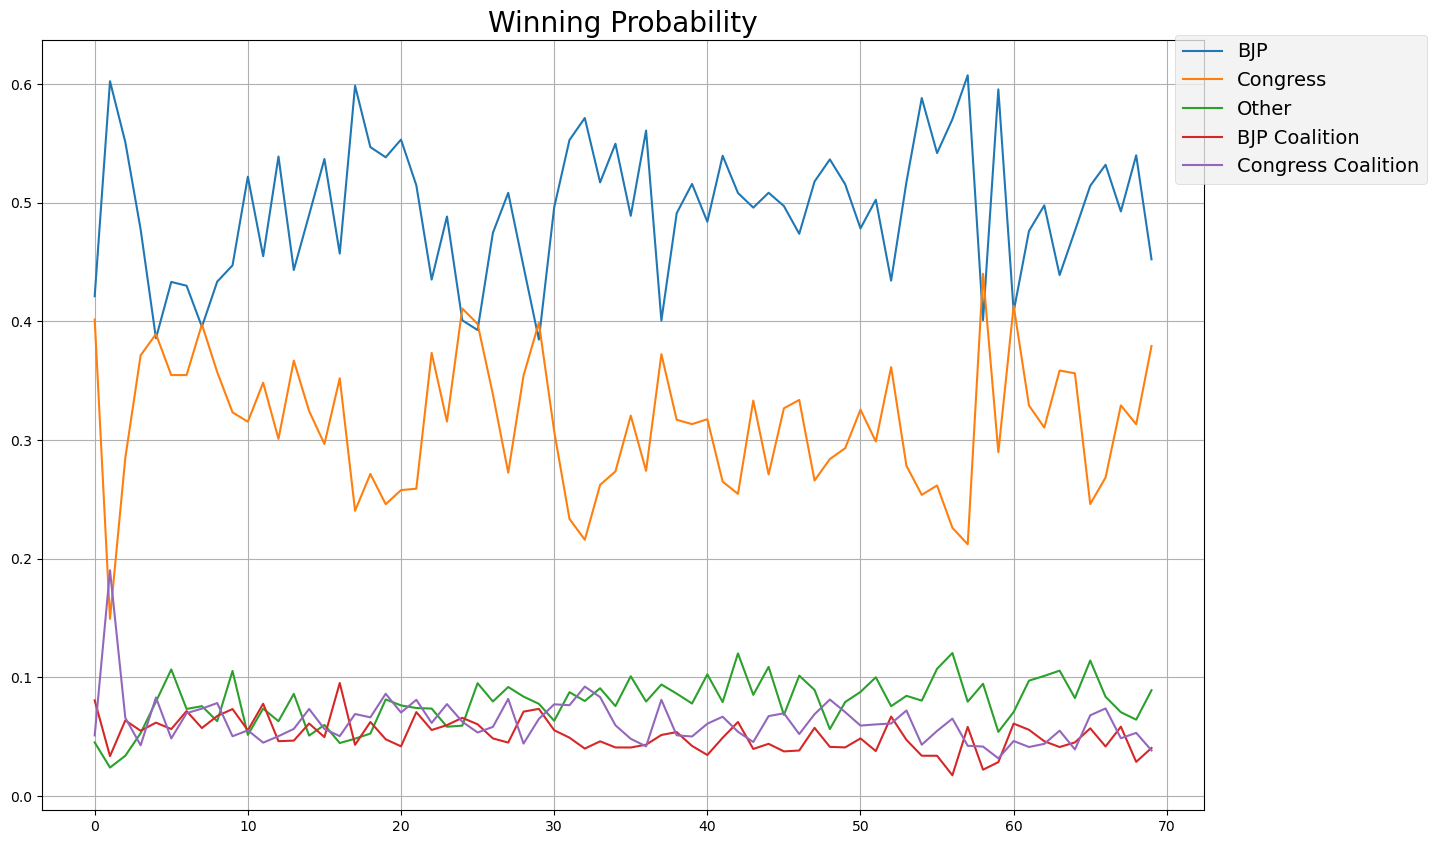

In [96]:
plt.figure(num ='Lok Sabha')
plt.rcParams["figure.figsize"] = [15,5]
labels = ["BJP","Congress","Other","BJP Coalition","Congress Coalition"]
x = [vote_bjp1, vote_cong1, vote_other1, vote_bjp_coal1, vote_cong_coal1]
for i in x:
    plt.plot([j  for j in range(len(i))],i,label= labels[x.index(i)])
plt.style.use('fivethirtyeight')
plt.title("Winning Probability")
plt.grid(True)
ax = plt.gca()
plt.legend(loc='best', bbox_to_anchor=(1, 0,0.2, 1.02))
plt.show()
plt.close()